# **Prediction Project for Stage of Cirrhosis Disease**

### **Data Set Story**

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

**Problem:** The aim is to predict the stage of the disease based on relevant blood and urine test data obtained from patients currently undergoing treatment or newly arriving at the clinic, using the cild-pugh staging system.

* Total Observations: 418
* Numerical Variables: 9 (including the "Id" variable provided in index form among the numerical variables. The relevant variable will be dropped in later stages of the project.)
* Categorical Variables: 11

### **Variables in the Dataset**

**1) ID:** unique identifier

**2) N_Days:** number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

**3) Status:** status of the patient C (censored), CL (censored due to liver tx), or D (death)

**4) Drug:** type of drug D-penicillamine or placebo

**5) Age:** age in [days]

**6) Sex:** M (male) or F (female)

**7) Ascites:** presence of ascites N (No) or Y (Yes)

**8) Hepatomegaly:** presence of hepatomegaly N (No) or Y (Yes)

**9) Spiders:** presence of spiders N (No) or Y (Yes)

**10) Edema:** presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

**11) Bilirubin:** serum bilirubin in [mg/dl]

**12) Cholesterol:** serum cholesterol in [mg/dl]

**13) Albumin:** albumin in [gm/dl]

**14) Copper:** urine copper in [ug/day]

**15) Alk_Phos:** alkaline phosphatase in [U/liter]

**16) SGOT:** SGOT in [U/ml]

**17) Triglycerides:** triglicerides in [mg/dl]

**18) Platelets:** platelets per cubic [ml/1000]

**19) Prothrombin:** prothrombin time in seconds [s]

**20) Stage:** histologic stage of disease (1, 2, 3, or 4)

# **Installation of Required Libraries and Set-Up for the Project**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, validation_curve
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

This line of code is used to ignore future warnings in Python. Warnings typically indicate that there may be a new feature or behavior that could change in future versions of the library or package being used. By using **"warnings.simplefilter(action='ignore', category=FutureWarning)"**, you are instructing Python to disregard or overlook any future warnings that may occur during the execution of your code. 

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

These options configure how Pandas displays the data in the output. Setting them to **"None"** allows for the full display of rows and columns, while the **"float_format"** option ensures that floating-point numbers are displayed with three decimal places.

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x:'%.3f'%x)

In the given code, the variable df is used to store the data read from a CSV file named **"cirrhosis.csv"**. The line **"df.head()"** is used to display the first few rows of the DataFrame. By default, it displays the first 5 rows. 

In [4]:
df=pd.read_csv('data/cirrhosis.csv')
df.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y     14.500      261.000    2.600 156.000  1718.000 137.950   
1     N      1.100      302.000    4.140  54.000  7394.800 113.520   
2     S      1.400      176.000    3.480 210.000   516.000  96.100   
3     S      1.800      244.000    2.540  64.000  6121.800  60.630   
4     N      3.400      279.000    3.530 143.000   671.000 113.150   

   Tryglicerides  Platelets  Prothrombin  Stage  
0        172.000    190.000       12.200  4.000  
1         88.000    221.000       10.600  3.000  
2         55.000    151.000       12.000  4.000  
3         92.000    183.000       10.300  4.000  
4         72.000    136.000       10.900  3.000

# **1. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to gain insights, identify patterns, and understand the underlying structure of the dataset. EDA is typically performed as a preliminary step before applying more complex analysis or modeling techniques.

#### **1.1 Data Processing**

* Dropping the unnecessary "ID" variable that won't be useful for our analysis.
* Formatting the "Age" variable given in days into a more appropriate format.

In [5]:
df.drop(['ID'], axis=1, inplace=True)

In [6]:
df['Age'] = (df['Age'].values/365).round()

#### **1.2. Overview Analysis**

During the overview analysis, we examine the general characteristics and properties of the dataset. This includes:

* Data Shape: Determining the number of rows and columns in the dataset to understand its size.

* Data Types: Identifying the data types of variables (e.g., numeric, categorical, datetime) to determine the nature of the data.

* Missing Values: Investigating the presence of missing values in the dataset and deciding on an appropriate strategy to handle them.

* Summary Statistics: Computing descriptive statistics (e.g., mean, median, standard deviation) for numeric variables to gain insights into the central tendencies and distributions.

* Categorical Variables: Analyzing the unique values and frequencies of categorical variables to understand the different categories and their proportions.

* Relationships: Exploring the correlations and relationships between variables through correlation analysis or visualization techniques.

The overview analysis provides a high-level understanding of the dataset and helps identify potential issues or patterns that may require further investigation.

In [7]:
def check_df(dataframe, head=5):
    print("############################# Shape #############################")
    print(dataframe.shape)
    print("\n")
    print("############################# Dtype #############################")
    print(dataframe.dtypes)
    print("\n")
    print("############################# Head #############################")
    print(dataframe.head(head))
    print("\n")
    print("############################# Tail #############################")
    print(dataframe.tail(head))
    print("\n")
    print("############################# NA #############################")
    print(dataframe.isnull().sum())
    print("\n")
    print("############################# Quantiles #############################")
    print(dataframe.describe([0, 0.05, 0.5, 0.95, 0.99, 1]).T)
    print("\n")

check_df(df)

############################# Shape #############################
(418, 19)


############################# Dtype #############################
N_Days             int64
Status            object
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


############################# Head #############################
   N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine 59.000   F       Y            Y       Y   
1    4500      C  D-penicillamine 56.000   F       N            Y       Y   
2    1012      D  D-penicillamine 70.000   M       N            N    

#### **1.3. Capturing Numerical and Categorical Variables (Resolving Type Errors if Present)**

During this step, we identify the numerical and categorical variables in the dataset and address any type errors if they exist. This involves:

* Identifying Numerical Variables: Examining the data to determine which variables are numerical, such as continuous or discrete variables representing quantities or measurements.

* Identifying Categorical Variables: Identifying variables that represent categories or labels, which can be either nominal (unordered) or ordinal (ordered) in nature.

* Resolving Type Errors: Checking for any type errors in the dataset, such as numerical variables mistakenly assigned as categorical or vice versa. Correcting these errors ensures that the variables are assigned the appropriate data types for subsequent analysis.

By accurately capturing the numerical and categorical variables and resolving any type errors, we ensure that the data is correctly interpreted and used in subsequent analytical tasks.

In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    This function takes a dataframe as input and returns the names of categorical, numerical, and categorical but cardinal variables.
    Note: Numerical variables with categorical appearance are also included in the categorical variables.

    Parameters
    ----------
    dataframe: dataframe
            Dataframe from which variable names are to be extracted.
    cat_th: int, optional
            threshold value for numerical but categorical variables.
    car_th: int, optional
            threshold value for categorical but cardinal variables.

    Returns
    -------
    cat_cols: list
            List of categorical variable names.
    num_cols: list
            List of numerical variable names.
    cat_but_car:list
            List of categorical (but cardinal) variable names.

    Notes
    -------
        cat_cols + num_cols + cat_but_car = total number of variables
        The variable "num_but_cat" is included in "cat_cols" (the list of categorical variables).

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    #num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observation: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observation: 418
Variables: 19
cat_cols: 8
num_cols: 11
cat_but_car: 0
num_but_cat: 1


In [9]:
cat_cols

['Status',
 'Drug',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Stage']

In [10]:
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

To convert the numerical variable "Stage" that represents the disease stage of patients into a categorical variable and resolve any type errors

In [11]:
df['Stage'] = df['Stage'].astype(object)
print (df['Stage'].dtypes)

object


#### **1.4. Categorical Variable Analysis**

Categorical Variable Analysis involves examining and exploring the characteristics and patterns within categorical variables in a dataset. This analysis helps us gain insights into the distribution, frequencies, and relationships of different categories within these variables. 

In [12]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#############################################################")
    print("\n")
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [13]:
for col in cat_cols:
    cat_summary(df,col)

    Status  Ratio
C      232 55.502
D      161 38.517
CL      25  5.981
#############################################################


                 Drug  Ratio
D-penicillamine   158 37.799
Placebo           154 36.842
#############################################################


   Sex  Ratio
F  374 89.474
M   44 10.526
#############################################################


   Ascites  Ratio
N      288 68.900
Y       24  5.742
#############################################################


   Hepatomegaly  Ratio
Y           160 38.278
N           152 36.364
#############################################################


   Spiders  Ratio
N      222 53.110
Y       90 21.531
#############################################################


   Edema  Ratio
N    354 84.689
S     44 10.526
Y     20  4.785
#############################################################


       Stage  Ratio
3.000    155 37.081
4.000    144 34.450
2.000     92 22.010
1.000     21  5.024
##########

#### **1.5. Numerical Variable Analysis**

Numerical variable analysis involves exploring and analyzing the characteristics and patterns within numerical variables in a dataset. This analysis aims to gain insights into the distribution, central tendency, dispersion, and relationships of numerical data. 

In [14]:
def num_summary(dataframe, numeric_col, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(dataframe[numeric_col].describe(quantiles).T)

    if plot:
        dataframe[numeric_col].hist()
        plt.xlabel(numeric_col)
        plt.title(numeric_col)
        plt.interactive(False)
        plt.show(block=True)


count    418.000
mean    1917.782
std     1104.673
min       41.000
5%       245.100
10%      606.800
20%      974.800
30%     1217.600
40%     1434.800
50%     1730.000
60%     2107.000
70%     2465.000
80%     2851.800
90%     3524.200
max     4795.000
Name: N_Days, dtype: float64


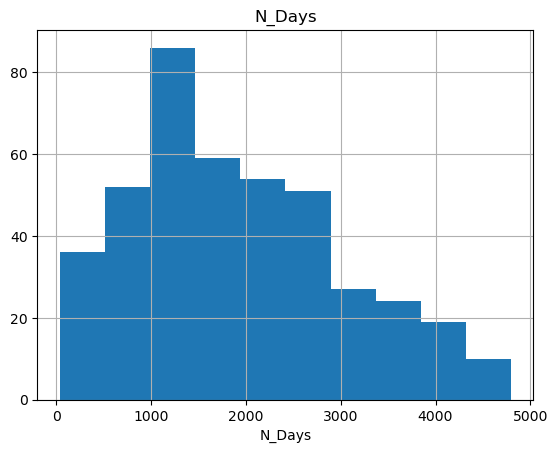

count   418.000
mean     50.773
std      10.443
min      26.000
5%       34.000
10%      36.700
20%      41.000
30%      45.000
40%      48.000
50%      51.000
60%      54.000
70%      56.000
80%      61.000
90%      64.300
max      78.000
Name: Age, dtype: float64


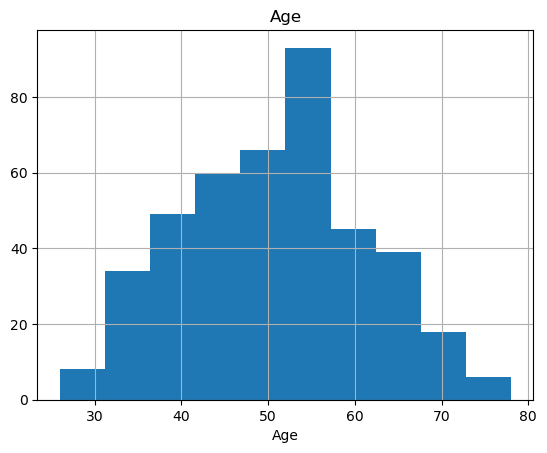

count   418.000
mean      3.221
std       4.408
min       0.300
5%        0.500
10%       0.600
20%       0.700
30%       0.900
40%       1.100
50%       1.400
60%       2.000
70%       3.000
80%       4.500
90%       8.030
max      28.000
Name: Bilirubin, dtype: float64


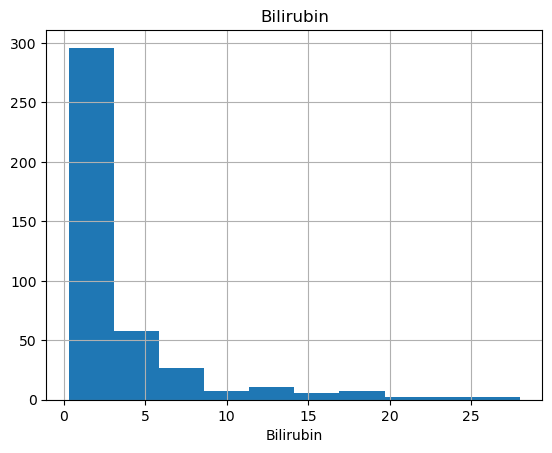

count    284.000
mean     369.511
std      231.945
min      120.000
5%       188.450
10%      213.600
20%      239.000
30%      258.900
40%      280.000
50%      309.500
60%      337.600
70%      375.100
80%      429.000
90%      560.800
max     1775.000
Name: Cholesterol, dtype: float64


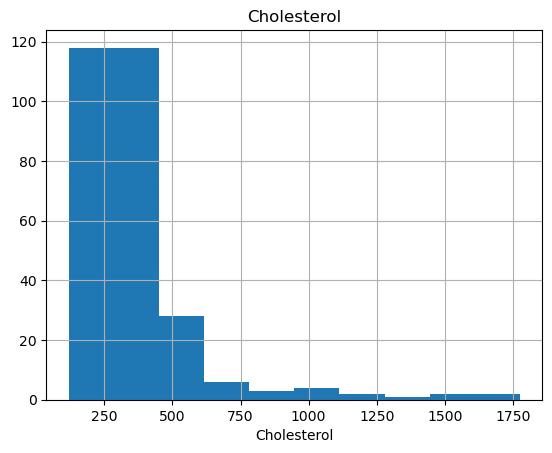

count   418.000
mean      3.497
std       0.425
min       1.960
5%        2.750
10%       2.967
20%       3.154
30%       3.340
40%       3.430
50%       3.530
60%       3.622
70%       3.720
80%       3.836
90%       4.010
max       4.640
Name: Albumin, dtype: float64


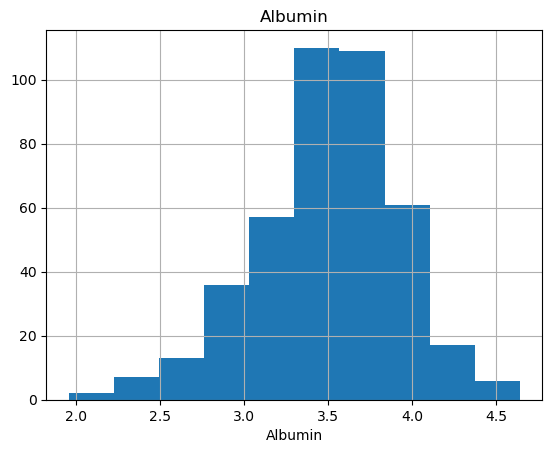

count   310.000
mean     97.648
std      85.614
min       4.000
5%       17.450
10%      24.000
20%      37.800
30%      48.000
40%      58.000
50%      73.000
60%      84.000
70%     108.000
80%     148.400
90%     208.100
max     588.000
Name: Copper, dtype: float64


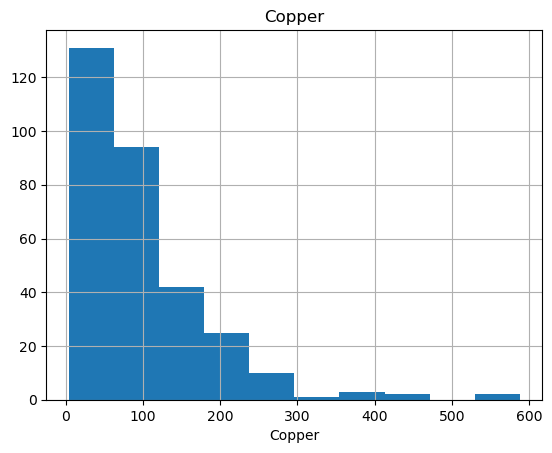

count     312.000
mean     1982.656
std      2140.389
min       289.000
5%        599.650
10%       663.000
20%       798.400
30%       964.900
40%      1089.400
50%      1259.000
60%      1554.800
70%      1823.900
80%      2240.200
90%      3826.400
max     13862.400
Name: Alk_Phos, dtype: float64


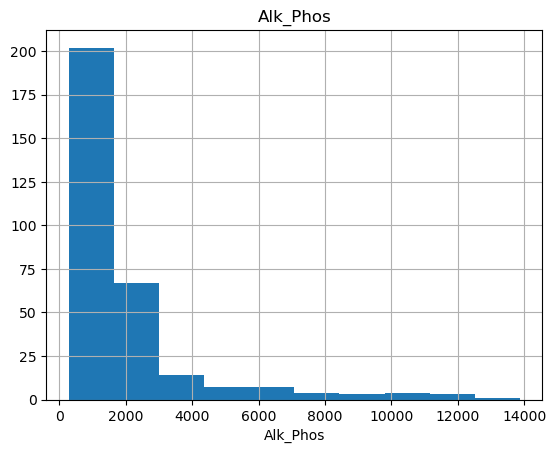

count   312.000
mean    122.556
std      56.700
min      26.350
5%       54.250
10%      60.450
20%      74.400
30%      86.800
40%      98.400
50%     114.700
60%     127.100
70%     139.850
80%     165.850
90%     196.465
max     457.250
Name: SGOT, dtype: float64


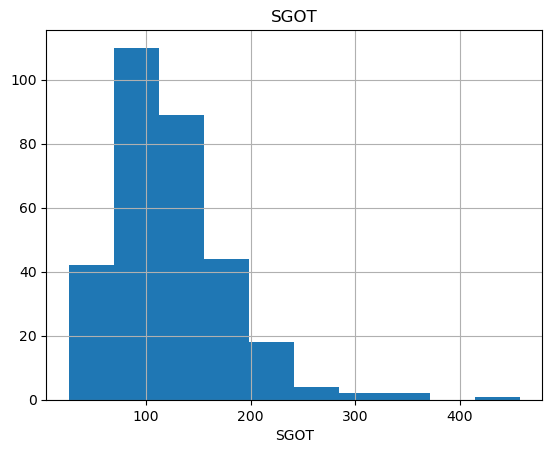

count   282.000
mean    124.702
std      65.149
min      33.000
5%       56.000
10%      63.100
20%      78.000
30%      89.000
40%      99.000
50%     108.000
60%     121.600
70%     140.000
80%     162.800
90%     195.000
max     598.000
Name: Tryglicerides, dtype: float64


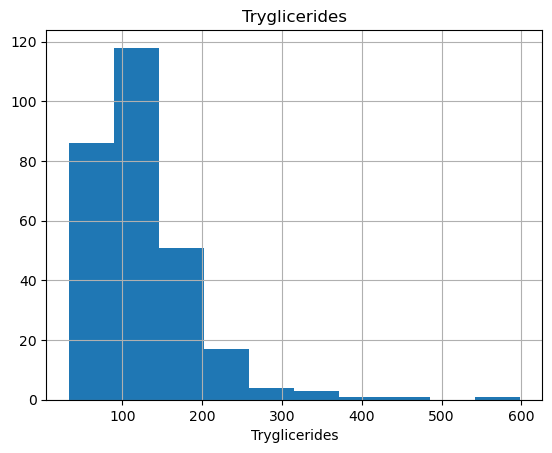

count   407.000
mean    257.025
std      98.326
min      62.000
5%      114.900
10%     138.200
20%     166.200
30%     203.000
40%     226.000
50%     251.000
60%     272.200
70%     302.200
80%     335.000
90%     386.200
max     721.000
Name: Platelets, dtype: float64


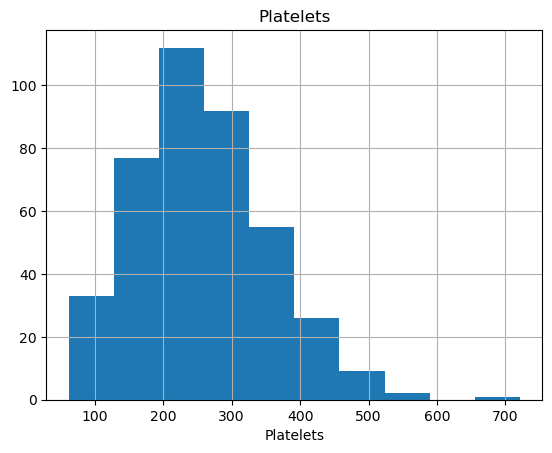

count   416.000
mean     10.732
std       1.022
min       9.000
5%        9.600
10%       9.800
20%       9.900
30%      10.100
40%      10.400
50%      10.600
60%      10.800
70%      11.000
80%      11.300
90%      12.000
max      18.000
Name: Prothrombin, dtype: float64


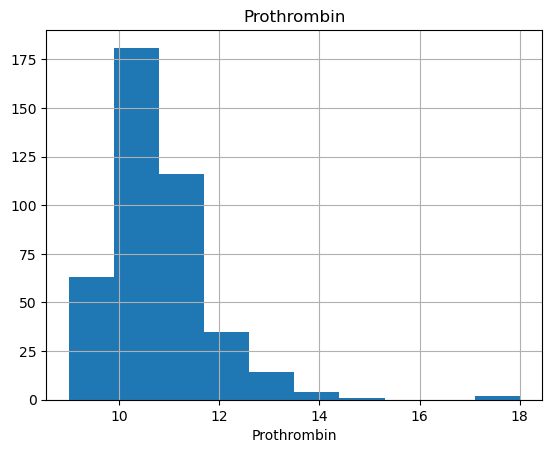

In [15]:
for col in num_cols:
    num_summary(df, col, plot="True")

#### **1.6. Target Variable Analysis**

In this step, we analyze the relationship between the target variable and other variables in the dataset. Specifically, we examine how the **target variable's mean varies across different categories of categorical variables and the mean of numerical variables based on the target variable**. This analysis helps us understand the influence and potential predictive power of these variables on the target variable.

Here are the key aspects of the target variable analysis:

1. Mean by Categorical Variables: Calculate the mean of the target variable for each category within categorical variables. This helps us identify if certain categories have significantly different average values for the target variable, indicating their potential importance in predicting the target.

2. Mean of Numerical Variables by Target Variable: Calculate the mean of numerical variables grouped by the target variable. This allows us to examine the average values of numerical variables for different levels or classes of the target variable, helping us identify patterns or relationships.

By conducting the target variable analysis, we can gain insights into the impact of categorical variables on the target variable's mean and understand how numerical variables vary based on the target variable. This information is useful for feature selection, identifying important predictors, and developing predictive models.

**1.6.1. Mean of the target variable by categorical variables**

In [16]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN":dataframe.groupby(categorical_col)[target].mean(),
                        "Count":dataframe.groupby(categorical_col)[target].count(),
                        "Ratio":100* dataframe[categorical_col].value_counts()/ dataframe.shape[0]}))

In [17]:
for col in cat_cols:
    target_summary_with_cat(df, "Stage", col)
    print("\n")

Status
    TARGET_MEAN  Count  Ratio
C         2.774    230 55.502
CL        3.200     25  5.981
D         3.363    157 38.517


Drug
                 TARGET_MEAN  Count  Ratio
D-penicillamine        2.975    158 37.799
Placebo                3.091    154 36.842


Sex
   TARGET_MEAN  Count  Ratio
F        3.019    368 89.474
M        3.068     44 10.526


Ascites
   TARGET_MEAN  Count  Ratio
N        2.969    288 68.900
Y        3.792     24  5.742


Hepatomegaly
   TARGET_MEAN  Count  Ratio
N        2.612    152 36.364
Y        3.431    160 38.278


Spiders
   TARGET_MEAN  Count  Ratio
N        2.869    222 53.110
Y        3.433     90 21.531


Edema
   TARGET_MEAN  Count  Ratio
N        2.937    348 84.689
S        3.386     44 10.526
Y        3.750     20  4.785


Stage
       TARGET_MEAN  Count  Ratio
1.000        1.000     21  5.024
2.000        2.000     92 22.010
3.000        3.000    155 37.081
4.000        4.000    144 34.450




**1.6.2. Mean of numerical variables by the target variable**

In [18]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}))

In [19]:
for col in num_cols:
    target_summary_with_num(df, "Stage", col)
    print("\n")

        N_Days
Stage         
1.000 2654.810
2.000 2389.837
3.000 1997.452
4.000 1420.250


         Age
Stage       
1.000 47.000
2.000 49.478
3.000 48.974
4.000 53.812


       Bilirubin
Stage           
1.000      1.362
2.000      2.453
3.000      2.826
4.000      4.427


       Cholesterol
Stage             
1.000      267.846
2.000      353.180
3.000      415.852
4.000      337.811


       Albumin
Stage         
1.000    3.705
2.000    3.607
3.000    3.592
4.000    3.302


       Copper
Stage        
1.000  62.812
2.000  68.030
3.000  92.075
4.000 127.102


       Alk_Phos
Stage          
1.000  1694.213
2.000  1816.907
3.000  2082.128
4.000  2017.367


         SGOT
Stage        
1.000  84.460
2.000 115.562
3.000 124.327
4.000 130.498


       Tryglicerides
Stage               
1.000         90.846
2.000        113.951
3.000        130.735
4.000        129.063


       Platelets
Stage           
1.000    291.800
2.000    286.895
3.000    263.118
4.000    224.866


       Prothro

#### **1.7. Correlation Analysis**

Correlation analysis is a statistical technique used to measure the strength and direction of the linear relationship between two or more variables. It helps us understand the extent to which changes in one variable are associated with changes in another variable. In correlation analysis, the correlation coefficient is calculated, which quantifies the degree of association between variables.

* **Correlation Matrix:** A correlation matrix is a table that displays the correlation coefficients between multiple variables. It provides a comprehensive view of the correlations between variables in a dataset, allowing us to identify patterns and relationships.

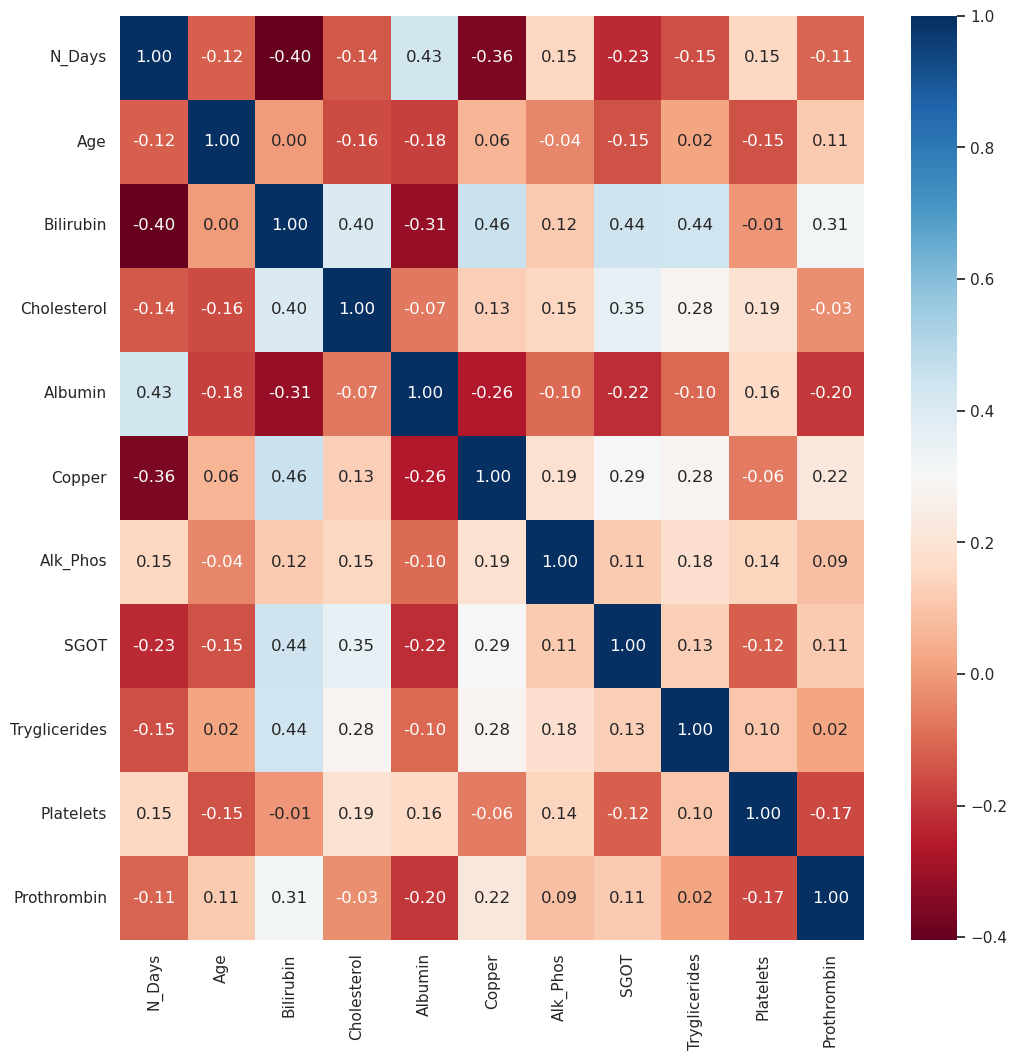

In [20]:
corr = df[num_cols].corr()

sns.set(rc = {"figure.figsize":(12,12)})
ax = sns.heatmap(corr, fmt=".2f", annot=True, cmap="RdBu") # korelasyonu gözlemleyebilmek için ısı haritası oluşturduk
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.interactive(False)
plt.show()

#### **1.8. Outlier Analysis**

Outlier analysis is a process of identifying and examining observations in a dataset that significantly deviate from the majority of the data. Outliers are data points that are unusually distant from other data points and can have a significant impact on statistical analyses and machine learning models.

Key points in outlier analysis:

* Definition of Outliers: Outliers are data points that fall outside the normal range or distribution of the data. They can be extremely high or low values compared to the rest of the dataset.

* Identification Methods: Various methods can be used to identify outliers, such as the z-score method, the modified z-score method, the interquartile range (IQR) method, and visual techniques like scatter plots or box plots. These methods help to detect observations that are statistically different from the majority of the data.

* Impact on Analysis: Outliers can have a significant impact on statistical analyses by affecting the mean, standard deviation, and other summary statistics. In predictive modeling, outliers can influence the model's performance and accuracy by introducing bias or influencing the relationships between variables.

* Handling Outliers: There are several approaches to handling outliers, including removing the outliers from the dataset, transforming the data to reduce the impact of outliers, or treating outliers as a separate category in the analysis. The approach chosen depends on the specific context and goals of the analysis.

* Interpretation: It is important to understand the underlying reasons for outliers and consider whether they are genuine observations or data errors. Outliers may represent rare events, measurement errors, or extreme values that are valid in the context of the problem being studied.

Outlier analysis helps identify and address data points that may significantly impact the analysis or modeling process. By appropriately handling outliers, we can improve the accuracy and reliability of our statistical analyses and predictive models.

**1.8.1. Outlier Detection**

In [21]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1=dataframe[col_name].quantile(q1)
    quartile3=dataframe[col_name].quantile(q3)
    interquantile_range= quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

If there are outliers, it returns true.

In [22]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [23]:
for col in num_cols:
    if col != "Stage":
        print(col, check_outlier(df,col))

N_Days False
Age False
Bilirubin False
Cholesterol True
Albumin False
Copper False
Alk_Phos False
SGOT False
Tryglicerides True
Platelets False
Prothrombin True


**1.8.2. Outlier Suppression**

In [24]:
def replace_with_threshold(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [25]:
for col in num_cols:
    if col != "Stage":
        replace_with_threshold(df, col)

After performing outlier suppression, the values that were previously flagged as outliers and returned **true** will now return **false**.

In [26]:
for col in num_cols:
    if col != "Stage":
        print(col, check_outlier(df,col))

N_Days False
Age False
Bilirubin False
Cholesterol False
Albumin False
Copper False
Alk_Phos False
SGOT False
Tryglicerides False
Platelets False
Prothrombin False


#### **1.9. Missing Data Analysis**

Missing data analysis refers to the process of examining and understanding the presence, patterns, and potential implications of missing values in a dataset. Missing data can occur when certain observations or variables have incomplete or unavailable information, which can impact data analysis, modeling, and inference.

Key points in missing data analysis:

* Types of Missing Data: There are different types of missing data, including Missing Completely at Random (MCAR), Missing at Random (MAR), and Missing Not at Random (MNAR). Understanding the type of missingness can provide insights into the potential mechanisms causing missing values.

* Identifying Missing Data: It is important to identify the presence of missing data in the dataset. Missing values can be represented by various symbols or codes, such as NaN (Not a Number), NA (Not Available), or blank cells. Visualizations, summary statistics, or specific functions can be used to detect missing values.

* Patterns of Missing Data: Analyzing the patterns of missing data helps identify any systematic or non-random mechanisms behind missingness. It involves examining the relationships between missing values and other variables in the dataset to determine if there are any specific factors influencing missingness.

* Implications of Missing Data: Missing data can introduce biases, reduce the effective sample size, and affect the validity and reliability of statistical analyses and modeling. It is crucial to consider the potential impact of missing values on the interpretation and generalizability of the results.
 
* Handling Missing Data: Depending on the nature and extent of missingness, various techniques can be applied to handle missing data, such as deletion (listwise deletion or pairwise deletion), imputation (filling in missing values with estimates), or advanced methods like multiple imputation or maximum likelihood estimation.

Missing data analysis allows for a comprehensive understanding of the missingness patterns in a dataset and informs appropriate strategies for handling missing values. By appropriately addressing missing data, researchers and analysts can minimize bias, improve the accuracy of results, and ensure the validity of their analyses.

**1.9.1. Missing Data Detection**

In [27]:
def missing_value_analysis(dataframe):
    print("Is there any missing data?")
    print(dataframe.isnull().values.any())
    print("##############################")
    print("\n")
    
    print("How much missing data is there in the variables?")
    print(dataframe.isnull().sum())
    print("##############################")
    print("\n")
    
    print("How many complete values are there in the variables?")
    print(dataframe.notnull().sum())
    print("##############################")
    print("\n")
    
    print("Total number of missing values in the dataset:")
    print(dataframe.isnull().sum().sum())
    print("##############################")
    print("\n")

In [28]:
missing_value_analysis(df)

Is there any missing data?
True
##############################


How much missing data is there in the variables?
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64
##############################


How many complete values are there in the variables?
N_Days           418
Status           418
Drug             312
Age              418
Sex              418
Ascites          312
Hepatomegaly     312
Spiders          312
Edema            418
Bilirubin        418
Cholesterol      284
Albumin          418
Copper           310
Alk_Phos         312
SGOT             312
Tryglicerides    282
Platelets        407
Prothrombin      416
Stage     

The **"missing_values_table"** function is a utility function used to analyze missing values in a dataset. It provides a summary of the missing values by calculating the total number and percentage of missing values for each variable. This allows users to quickly identify which variables have missing values and the extent of missingness in each variable.

In [29]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [30]:
na_columns = missing_values_table(df, na_name=True)

               n_miss  ratio
Tryglicerides     136 32.540
Cholesterol       134 32.060
Copper            108 25.840
Drug              106 25.360
Ascites           106 25.360
Hepatomegaly      106 25.360
Spiders           106 25.360
Alk_Phos          106 25.360
SGOT              106 25.360
Platelets          11  2.630
Stage               6  1.440
Prothrombin         2  0.480


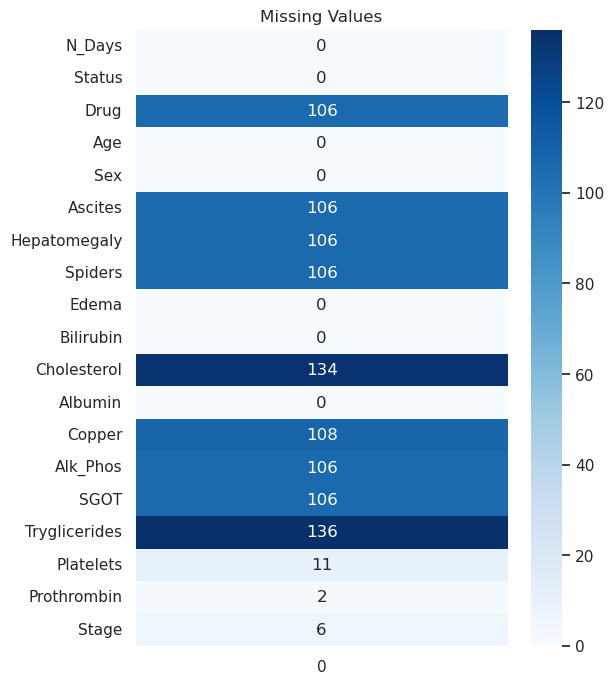

In [31]:
plt.figure(figsize=(6, 8))
plt.title('Missing Values')
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='Blues')
plt.show()

**1.9.2. Filling Missing Values**

Filling missing values refers to the process of replacing or imputing the missing values in a dataset with estimated or substituted values. This is done to ensure that the dataset is complete and ready for analysis or modeling. There are various techniques for filling missing values, depending on the nature of the data and the analysis goals. 

* Mean/Median/Mode Imputation: Missing values can be filled with the mean, median, or mode value of the respective variable. This method assumes that the missing values are missing at random and can be replaced with the central tendency of the variable.

It is important to consider the underlying assumptions and limitations of each imputation method and select an approach that is appropriate for the specific dataset and analysis context. Additionally, it is essential to evaluate the impact of imputation on the results and interpretation of the analysis.

In [32]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="Stage"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Lists the variables with missing values

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Number of missing values in variables before the application

    # If the variable is object type and has a number of unique values less than or equal to cat_length, fill the missing values with mode
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # If num_method is 'mean', fill the missing values of non-object type variables with the mean
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # If num_method is 'median', fill the missing values of non-object type variables with the median
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

In [33]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
Cholesterol      134
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

Drug             0
Ascites          0
Hepatomegaly     0
Spiders          0
Cholesterol      0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            6
dtype: int64 




A total of 6 "NA" values within the Stage variable have been removed.

In [34]:
df.dropna(inplace=True)

# **2. Base Model**

A base model is initially created to establish a baseline performance for comparison in machine learning tasks. It serves as the starting point for model development and allows us to evaluate the effectiveness of more complex or advanced models.

Here are some reasons why a base model is created:

* Performance Comparison: By developing a base model, we can compare its performance with other models or advanced techniques. This helps us understand the improvement achieved by using more sophisticated algorithms or feature engineering methods.
 
* Initial Evaluation: The base model provides an initial evaluation of the dataset and its predictability. It helps us gain insights into the data and identify any challenges or limitations that need to be addressed.

* Benchmarking: A base model acts as a benchmark to assess the performance of subsequent models. It serves as a reference point to determine if the subsequent models are achieving better accuracy, precision, recall, or other evaluation metrics.

* Feature Importance: Base models can provide insights into the importance of different features in the dataset. By analyzing the model's coefficients, feature importances, or decision rules, we can gain an understanding of which features have the most influence on the target variable.
 
* Interpretability: Some base models, such as logistic regression or decision trees, offer interpretability, allowing us to understand the underlying relationships between the input features and the target variable. This can help in explaining the model's predictions to stakeholders or understanding the driving factors behind certain outcomes.
 
Once the base model is established, it serves as a starting point for further model development, including feature engineering, hyperparameter tuning, ensemble methods, or more advanced algorithms. By comparing the performance of subsequent models against the base model, we can measure progress and make informed decisions on which techniques to apply to improve predictive accuracy.

Firstly, the statement **dff = df.copy()** creates a full copy of the df DataFrame. By using the copy() method, all the data and structure of the df DataFrame are replicated into a new DataFrame object called **dff**. 

In [35]:
dff = df.copy()

In [36]:
cat_cols, cat_but_car, num_cols = grab_col_names(dff)

Observation: 412
Variables: 19
cat_cols: 8
num_cols: 11
cat_but_car: 0
num_but_cat: 0


Since the **"Stage"** variable is the target variable, it is removed from the **cat_cols** list before the encoding process begins.

In [37]:
cat_cols = [col for col in cat_cols if col not in ["Stage"]]
cat_cols

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

#### **2.1. Encoding**

Encoding refers to the process of converting categorical variables into numerical representations that machine learning algorithms can understand. Categorical variables are variables that represent different categories or labels, such as colors, types of objects, or groups.

Machine learning models typically require numerical input, so encoding categorical variables is necessary to represent these categories as numbers. There are various encoding techniques available, including one-hot encoding and label encoding.

* One-Hot Encoding: It creates binary columns for each category of a categorical variable. Each category is represented by a column, and the presence or absence of the category is indicated by a 1 or 0, respectively.

* Label Encoding: It assigns a unique numerical label to each category. This is useful for categorical variables without an inherent order, as it simply maps each category to a different integer value.

The choice of encoding technique depends on the nature of the data and the requirements of the machine learning algorithm. The encoded categorical variables can then be used as input features in training a model to make predictions or perform classification tasks.

In this problem, one-hot encoding was preferred over label encoding. However, the label encoding approach was also applied to demonstrate the difference between the two methods.

**2.1.1. Label Encoding**

The function **label_encoder** applies label encoding to a specific column (binary_col) in the given dataframe by using the **LabelEncoder** class from scikit-learn.

In [38]:
def label_encoder(dataframe, binary_col, drop_first=True):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [39]:
binary_cols = [col for col in dff.columns if dff[col].dtype not in [int, float] and dff[col].nunique() == 2]
print(binary_cols)

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']


In [40]:
for col in binary_cols:
    label_encoder(dff, col)

In [41]:
dff.head()

N_Days Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders Edema  \
0  400.000      D     0 59.000    0        1             1        1     Y   
1 4500.000      C     0 56.000    0        0             1        1     N   
2 1012.000      D     0 70.000    1        0             0        0     S   
3 1925.000      D     0 55.000    0        0             1        1     S   
4 1504.000     CL     1 38.000    0        0             1        1     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0     14.500      261.000    2.600 156.000  1718.000 137.950        172.000   
1      1.100      302.000    4.140  54.000  7394.800 113.520         88.000   
2      1.400      176.000    3.480 210.000   516.000  96.100         55.000   
3      1.800      244.000    2.540  64.000  6121.800  60.630         92.000   
4      3.400      279.000    3.530 143.000   671.000 113.150         72.000   

   Platelets  Prothrombin Stage  
0    190.000       12.200 4.000  
1    221.000       10.600 3.000  
2    151.000       12.000 4.000  
3    183.000       10.300 4.000  
4    136.000       10.900 3.000

**2.1.2. One-Hot Encoder**

The **one_hot_encoder** function is used to perform one-hot encoding on the categorical columns of a dataframe. 

In [42]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(df, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [43]:
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [44]:
dff.shape

(412, 21)

In [45]:
dff.head()

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0  400.000 59.000     14.500      261.000    2.600 156.000  1718.000 137.950   
1 4500.000 56.000      1.100      302.000    4.140  54.000  7394.800 113.520   
2 1012.000 70.000      1.400      176.000    3.480 210.000   516.000  96.100   
3 1925.000 55.000      1.800      244.000    2.540  64.000  6121.800  60.630   
4 1504.000 38.000      3.400      279.000    3.530 143.000   671.000 113.150   

   Tryglicerides  Platelets  Prothrombin Stage  Status_CL  Status_D  \
0        172.000    190.000       12.200 4.000          0         1   
1         88.000    221.000       10.600 3.000          0         0   
2         55.000    151.000       12.000 4.000          0         1   
3         92.000    183.000       10.300 4.000          0         1   
4         72.000    136.000       10.900 3.000          1         0   

   Drug_Placebo  Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  Edema_S  Edema_Y  
0             0      0          1               1          1        0        1  
1             0      0          0               1          1        0        0  
2             0      1          0               0          0        1        0  
3             0      0          0               1          1        1        0  
4             1      0          0               1          1        0        0

### **2.2. Base Model Setup**

For the base model setup, we will perform model training and evaluation using both **hold-out validation** and **k-fold cross-validation**. The following models will be set up and evaluated using confusion matrix and classification report test metrics:

**1. Logistic Regression (LR):** This model is a linear classification algorithm that uses logistic regression to predict the target variable.

**2. K-Nearest Neighbors (KNN):** This model is a non-parametric classification algorithm that classifies new data points based on the majority vote of their k nearest neighbors.

**3. Decision Tree (CART):** This model is a non-parametric classification algorithm that uses a tree-like model of decisions and their possible consequences.

**4. Random Forest (RF):** This model is an ensemble learning method that combines multiple decision trees to make predictions.

**5. Gradient Boosting Machine (GBM):** This model is an ensemble learning method that builds a strong model by sequentially adding weak models to minimize the loss function.

**6. CatBoost (CatBoost):** This model is a gradient boosting algorithm specifically designed to handle categorical features effectively.

For each model, we will perform the following steps:

* Split the data into training and testing sets using hold-out validation or perform k-fold cross-validation.

* Train the model using the training data.

* Make predictions on the test data.

* Evaluate the model's performance using the **confusion matrix** and **classification report metrics**, which provide information on the model's **accuracy**, **precision**, **recall**, and **F1-score** for each class.

By comparing the test metrics of the different models, we can assess their performance and choose the best model for our classification task.

**2.2.1. Hold-Out Validation for Base Model**

Hold-out validation is a technique used in model evaluation and validation. In this approach, the available dataset is split into two separate sets: **a training set** and a **validation set** (also referred to as a test set).

First, for the hold-out method, we made a copy of the dff dataframe and named it **df_hold_out**.

In [46]:
df_hold_out = dff.copy()

Next, we divided the data into input features and the target variable. We assigned the target variable to **y** by converting it to the integer type using the astype(int) method. We assigned the input features to **X** by dropping the "Stage" column from the df_hold_out dataframe using the drop method with axis=1.

In [47]:
y = df_hold_out["Stage"].astype(int)
X = df_hold_out.drop(["Stage"], axis=1)

Then, we split the data into training and testing sets using the train_test_split function from scikit-learn. We specified the test_size parameter as 0.2, indicating that 20% of the data will be used for testing. The resulting splits are assigned to **X_train**, **X_test**, **y_train**, and **y_test**, representing the training and testing subsets of the input features and the target variable, respectively.

In [48]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

The models we will use are defined within the **models list**. These defined models are then used within a loop to train and evaluate the models. This allows for the comparison of models with each other.

In [49]:
models = [("LR", LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("CART", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier()),
          ("GBM", GradientBoostingClassifier()),
          ("CatBoost", CatBoostClassifier(iterations = 500, verbose=False))
         ]

The labels contained in the "Stage" variable are defined within the **class_names list**.

In [50]:
class_names = ["1", "2", "3", "4"]

The code above performs model training and evaluation using a loop over the models in the models list. 

The confusion matrix provides insights into the correct and incorrect predictions for each class, allowing for a detailed analysis of accuracy. The classification report includes metrics such as F1 score, precision, recall, and accuracy for each class, providing a comprehensive analysis of performance metrics for classification models.

***Confusion Matrix:***

* The confusion matrix is a table that shows the performance of a classification model by summarizing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

* It provides a detailed breakdown of the model's predictions for each class, allowing us to evaluate its performance on different classes separately.

* The rows of the matrix represent the actual classes, while the columns represent the predicted classes.

* The diagonal elements of the matrix represent the correct predictions, while the off-diagonal elements represent the incorrect predictions.

* By analyzing the confusion matrix, we can assess the model's accuracy, precision, recall, and other metrics for each class.

***Classification Report:***

The classification report provides a comprehensive evaluation of a classification model's performance, including metrics such as precision, recall, F1 score, and support.

* Precision: It measures the proportion of correctly predicted positive instances (TP) out of the total instances predicted as positive (TP + FP). It represents the model's ability to minimize false positives.

* Recall (Sensitivity or True Positive Rate): It measures the proportion of correctly predicted positive instances (TP) out of the total actual positive instances (TP + FN). It represents the model's ability to minimize false negatives.

* F1 Score: It is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy. It is particularly useful when dealing with imbalanced datasets.

* Support: It represents the number of instances in each class, indicating the distribution of the classes in the dataset.

The classification report is generated for each class individually, allowing us to assess the model's performance for different classes separately.

By examining the confusion matrix and classification report, we can gain insights into a model's overall performance, identify potential areas of improvement, and compare the performance of different models based on various metrics.

Performance Metrics for LR on Test and Train Sets


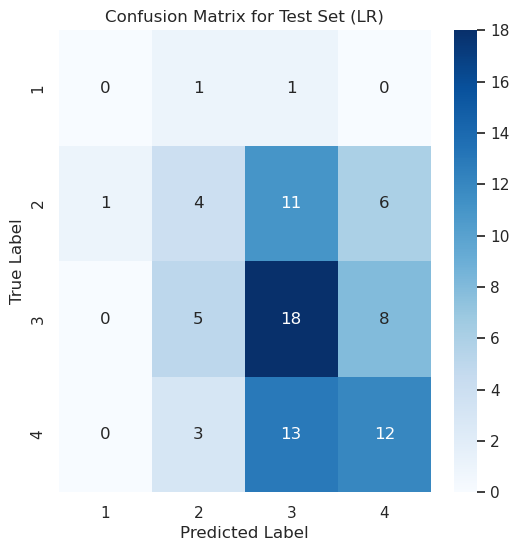



Classification Report for Test Set (LR) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.31      0.18      0.23        22
           3       0.42      0.58      0.49        31
           4       0.46      0.43      0.44        28

    accuracy                           0.41        83
   macro avg       0.30      0.30      0.29        83
weighted avg       0.39      0.41      0.39        83





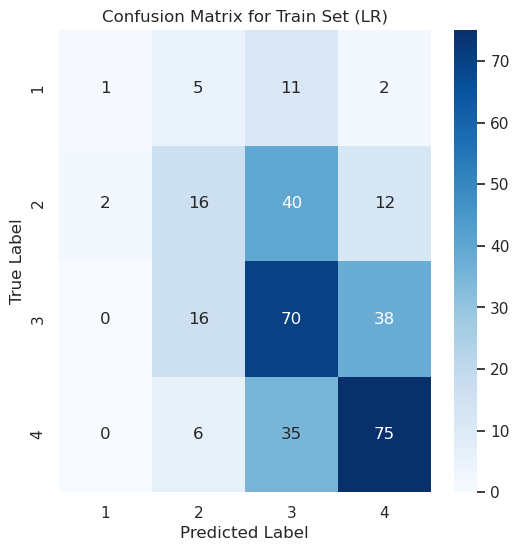

Classification Report for Train Set (LR) :
              precision    recall  f1-score   support

           1       0.33      0.05      0.09        19
           2       0.37      0.23      0.28        70
           3       0.45      0.56      0.50       124
           4       0.59      0.65      0.62       116

    accuracy                           0.49       329
   macro avg       0.44      0.37      0.37       329
weighted avg       0.48      0.49      0.47       329

-----------------------------------------------------------------------


Performance Metrics for KNN on Test and Train Sets


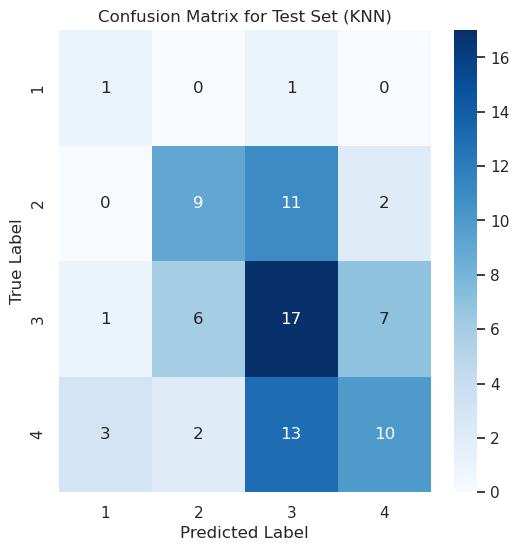



Classification Report for Test Set (KNN) :
              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.53      0.41      0.46        22
           3       0.40      0.55      0.47        31
           4       0.53      0.36      0.43        28

    accuracy                           0.45        83
   macro avg       0.42      0.45      0.41        83
weighted avg       0.47      0.45      0.45        83





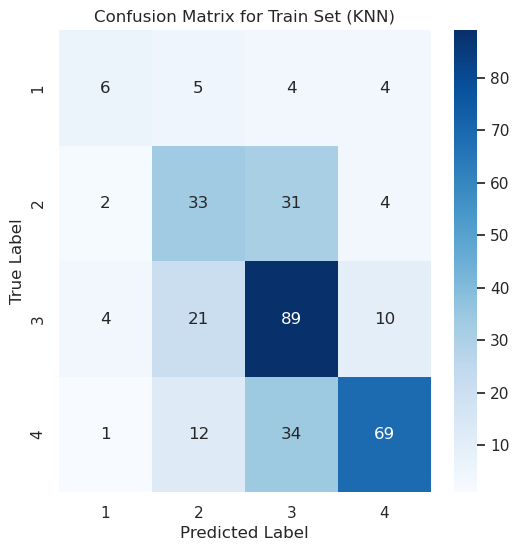

Classification Report for Train Set (KNN) :
              precision    recall  f1-score   support

           1       0.46      0.32      0.37        19
           2       0.46      0.47      0.47        70
           3       0.56      0.72      0.63       124
           4       0.79      0.59      0.68       116

    accuracy                           0.60       329
   macro avg       0.57      0.52      0.54       329
weighted avg       0.62      0.60      0.60       329

-----------------------------------------------------------------------


Performance Metrics for CART on Test and Train Sets


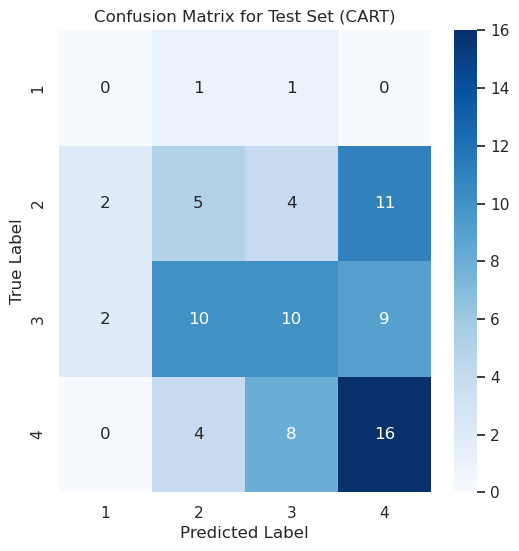



Classification Report for Test Set (CART) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.25      0.23      0.24        22
           3       0.43      0.32      0.37        31
           4       0.44      0.57      0.50        28

    accuracy                           0.37        83
   macro avg       0.28      0.28      0.28        83
weighted avg       0.38      0.37      0.37        83





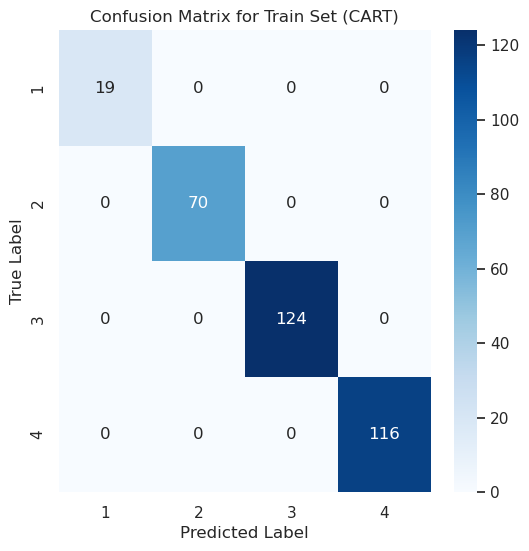

Classification Report for Train Set (CART) :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       116

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

-----------------------------------------------------------------------


Performance Metrics for RF on Test and Train Sets


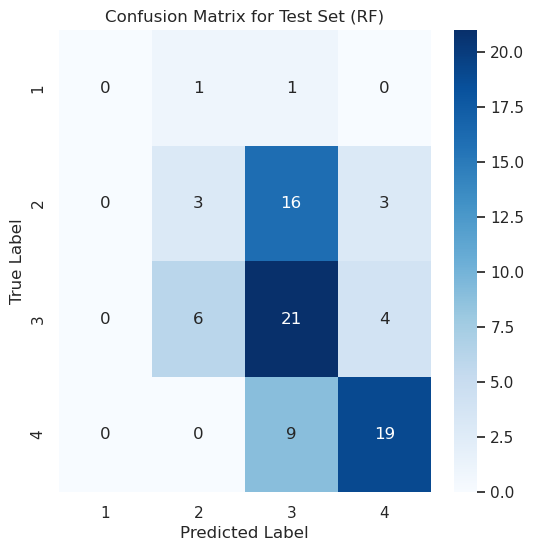



Classification Report for Test Set (RF) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.30      0.14      0.19        22
           3       0.45      0.68      0.54        31
           4       0.73      0.68      0.70        28

    accuracy                           0.52        83
   macro avg       0.37      0.37      0.36        83
weighted avg       0.49      0.52      0.49        83





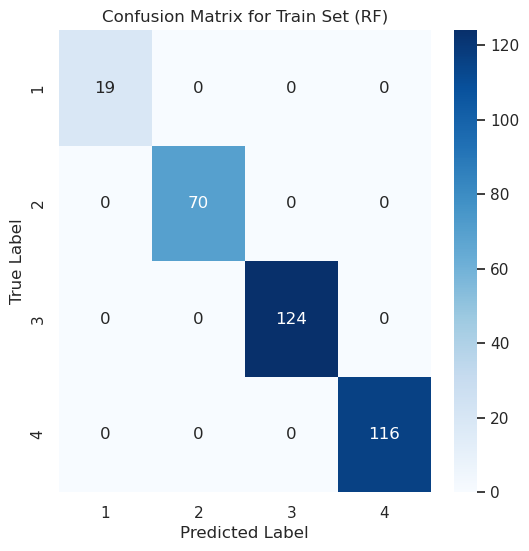

Classification Report for Train Set (RF) :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       116

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

-----------------------------------------------------------------------


Performance Metrics for GBM on Test and Train Sets


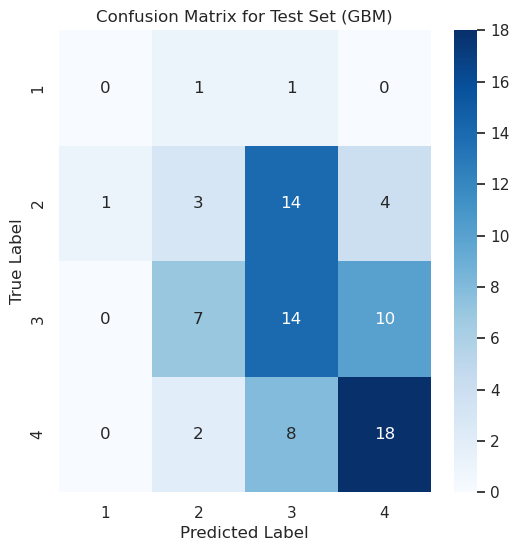



Classification Report for Test Set (GBM) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.23      0.14      0.17        22
           3       0.38      0.45      0.41        31
           4       0.56      0.64      0.60        28

    accuracy                           0.42        83
   macro avg       0.29      0.31      0.30        83
weighted avg       0.39      0.42      0.40        83





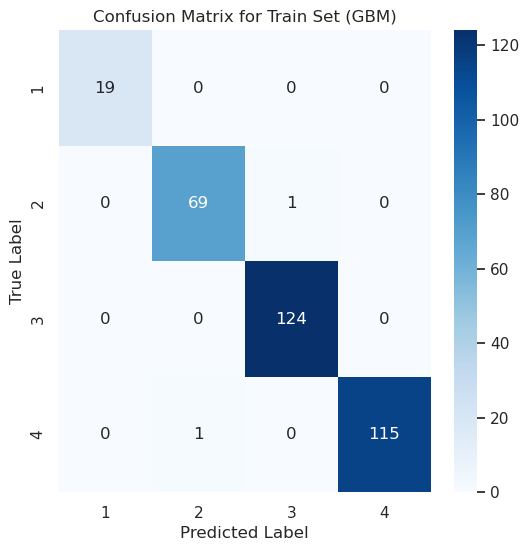

Classification Report for Train Set (GBM) :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.99      0.99      0.99        70
           3       0.99      1.00      1.00       124
           4       1.00      0.99      1.00       116

    accuracy                           0.99       329
   macro avg       0.99      0.99      0.99       329
weighted avg       0.99      0.99      0.99       329

-----------------------------------------------------------------------


Performance Metrics for CatBoost on Test and Train Sets


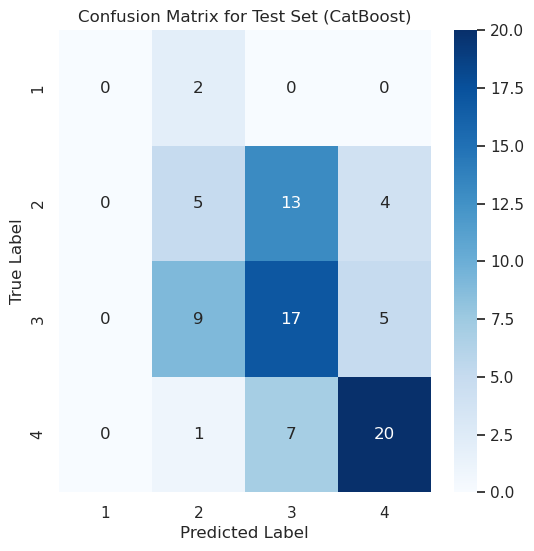



Classification Report for Test Set (CatBoost) :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.29      0.23      0.26        22
           3       0.46      0.55      0.50        31
           4       0.69      0.71      0.70        28

    accuracy                           0.51        83
   macro avg       0.36      0.37      0.36        83
weighted avg       0.48      0.51      0.49        83





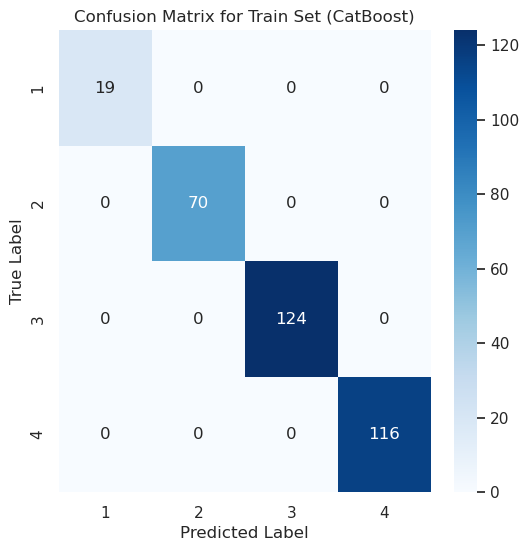

Classification Report for Train Set (CatBoost) :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       116

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

-----------------------------------------------------------------------




In [51]:
for name, classifier in models:

    warnings.filterwarnings("ignore")

    model = classifier.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # The confusion matrix allows us to examine the correct and incorrect prediction results for each class in the models. 
    # This provides a detailed analysis opportunity for accuracy evaluation.

    # Confusion matrix for the test set provides the following results
    print(f"Performance Metrics for {name} on Test and Train Sets")
    cm_test = confusion_matrix(y_test, y_pred)

    class_labels = np.unique(y_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Test Set ({name})')
    plt.show()
    print("\n")

    # Classification report provides f1, precision, recall, and accuracy values for each class in all models.
    # It is used for a detailed analysis of performance metrics in classification models.

    cr_test = classification_report(y_test, y_pred)
    print(f"Classification Report for Test Set ({name}) :\n{cr_test}")
    print("\n")

    # Confusion matrix results for the training set

    cm_train = confusion_matrix(y_train, y_pred_train)

    class_labels = np.unique(y_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Train Set ({name})')
    plt.show()

    cr_train = classification_report(y_train, y_pred_train)
    print(f"Classification Report for Train Set ({name}) :\n{cr_train}")
    print("-----------------------------------------------------------------------")
    print("\n")

**2.2.2. K-fold Cross Validation for Base Model**

K-fold cross-validation is a technique used to assess the performance of a machine learning model by dividing the available data into k subsets or "folds." It helps in estimating how well the model is likely to generalize to unseen data.

Here's how k-fold cross-validation is typically applied:

**1.** The dataset is divided into k equal-sized folds.

**2.** The model is trained k times, each time using a different fold as the validation set and the remaining folds as the training set.

**3.** The performance metrics (such as accuracy, precision, recall, or F1-score) are computed for each fold.

**4.** The average performance across all folds is calculated to obtain an overall evaluation of the model's performance.

K-fold cross-validation is applied to provide a more reliable estimate of the model's performance and to assess its generalization ability. Here are some reasons why it is commonly used:

* **Mitigating Overfitting:** By training and evaluating the model on different subsets of the data, k-fold cross-validation helps to mitigate overfitting. It provides a more realistic estimate of how well the model will perform on unseen data.

* **Efficient Use of Data:** K-fold cross-validation allows for the efficient use of available data. Each data point is used for both training and validation, ensuring that the model is exposed to as much information as possible.

* **Model Selection and Hyperparameter Tuning:** K-fold cross-validation is often used for comparing different models or tuning model hyperparameters. It provides a fair and unbiased evaluation of different models or parameter settings, helping to choose the best performing one.

First, for the k-fold cross validation method, we made a copy of the dff dataframe and named it **df_cross_validation**.

In [52]:
df_cross_validation = dff.copy()

In [53]:
for name, classifier in models:

    warnings.filterwarnings("ignore")

    # Perform k-fold cross-validation using the cross_val_score function.
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)

    # Display the results.
    print(f"---------------------- {name} Model ----------------------")

    print("Accuracy:", cv_results['test_accuracy'])
    print("Precision:", cv_results['test_precision_macro'])
    print("Recall:", cv_results['test_recall_macro'])
    print("F1-score:", cv_results['test_f1_macro'])
    print("..")
    print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
    print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
    print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
    print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))
    print("\n")

---------------------- LR Model ----------------------
Accuracy: [0.42168675 0.40963855 0.51219512 0.41463415 0.46341463]
Precision: [0.3622936  0.30447368 0.37149123 0.314942   0.33341837]
Recall: [0.37782112 0.31110184 0.38726672 0.30112162 0.33651164]
F1-score: [0.35312473 0.30589285 0.37635465 0.29076923 0.30118681]
..
Average Accuracy: 0.44
Average Precision: 0.34
Average Recall: 0.34
Average F1-score: 0.33


---------------------- KNN Model ----------------------
Accuracy: [0.39759036 0.39759036 0.3902439  0.3902439  0.35365854]
Precision: [0.3003168  0.36911755 0.31571146 0.27314815 0.25892857]
Recall: [0.2869709  0.39855704 0.30217217 0.28276789 0.27912018]
F1-score: [0.27975792 0.36732192 0.28374248 0.27714108 0.26351161]
..
Average Accuracy: 0.39
Average Precision: 0.3
Average Recall: 0.31
Average F1-score: 0.29


---------------------- CART Model ----------------------
Accuracy: [0.39759036 0.40963855 0.42682927 0.46341463 0.42682927]
Precision: [0.40061275 0.39052795 0.3724

Both hold-out validation results and k-fold cross-validation results have been analyzed for various models using base models. The highest accuracy rate is around 0.5. Considering the size of the dataset, it can be reasonable to accept a lower accuracy rate. Therefore, we will try to improve the model performance by using feature engineering methods to generate new variables that are suitable for the structure of the dataset. With the newly created variables, we will repeat the training and performance metric methods we applied. Based on the obtained results, we will make a decision on the final model.

# **3. Feature Engineering**

Feature engineering is a technique used in data analytics and machine learning to optimize the use of existing features in a dataset or create new features through various operations.

The goal of feature engineering is to make the features in a dataset more meaningful, improve model performance, and achieve better results. This process typically involves understanding the dataset, preprocessing the data, feature selection, and feature transformation.

Feature engineering contributes to improved performance by providing the model with more relevant information through the selection of appropriate features and transformations.

#### **3.1. Creating New Variables**

In summary, the following variables were used in the code segments:

**1. N_Days_new:** Categorizes the "N_Days" variable into 5 equal-sized bins based on their distribution.

**2. Threshold Values for Biomarkers in Liver Disease Diagnosis:** These biomarkers include Bilirubin, Cholesterol, Albumin, Copper, Alkaline Phosphatase (Alk_Phos), SGOT, Tryglicerides, Platelets, and Prothrombin. High or low levels of these biomarkers can provide valuable information about the potential presence and severity of liver disease. Monitoring and interpreting these biomarker levels can aid in the diagnosis and management of liver-related conditions.

**3. NEW_SEX_CAT:** Categorized variable based on Sex and Age to identify different age groups and genders.

**4. drugstage:** Categorized variable based on Drug and Stage to assess the effect of a specific drug on different stages of the disease.

**5. edemastage:** Categorized variable based on Edema and Stage to assess the relationship between Edema, diuretic use, and disease stage.

**6. ascitestage:** Categorized variable based on Ascites and Stage to evaluate the presence of ascites in relation to the disease stage.

**7. Riskother:** Represents the ratio of Tryglicerides to Cholesterol.

**3.1.1. N_Days_new**

This new variable is derived from the existing variable "N_Days", which represents the duration from hospital admission to events such as death, transplantation, or data collection for research purposes.

By creating this new variable with 5 equal-sized intervals, we can group the "N_Days" values into categories that capture the different durations or time intervals in a more balanced and meaningful way. This can help in analyzing and understanding the relationship between the duration and other variables or outcomes in the dataset.

In [54]:
df["N_Days_new"] = pd.qcut(df['N_Days'], 5)

**3.1.2. Threshold Values for Biomarkers in Liver Disease Diagnosis**

These new variables indicate whether certain measurements are considered high or low based on predefined thresholds or normal ranges. By generating these new features, the aim is to capture potentially meaningful patterns or relationships between these measurements and the target variable. This process helps enhance the dataset and potentially improves the performance of the model by providing additional information for analysis and prediction.

The threshold values for the following variables have been defined:

**1. Bilirubin:**
* High: Bilirubin >= 1.2 mg/dl (Normal range: below 1.2 mg/dl)

**2. Cholesterol:**
* High: Cholesterol >= 200 mg/dl (Normal range: below 200 mg/dl)

**3. Albumin:**
* High: Albumin >= 5.4 (Normal range: 3.4 - 5.4)
* Low: Albumin > 3.4 (Symptom of the disease)
 
**4. Copper:**
* High: Copper >= 50 (Normal range: 20-50 μg)
* Low: Copper < 20
 
**5. Alk_Phos (Alkaline Phosphatase):**
* High: Alk_Phos > 147 (Normal range: 44-147 U/L)
* Low: Alk_Phos < 44

**6. SGOT (Serum Glutamic Oxaloacetic Transaminase):**
* High: SGOT > 36 (Normal range: <= 36 U/L)
* Normal: SGOT <= 36
 
**7. Tryglicerides:**
* High: Tryglicerides > 199 mg/dl (Normal range: <= 199 mg/dl)
* Normal: Tryglicerides <= 199
 
**8. Platelets:**
* Normality: Platelets >= 180,000 (Normal range: 180,000 ml/1000 cubic)
* Anormality: Platelets < 180,000
 
**9. Prothrombin:**
* High: Prothrombin > 13.5 seconds (Normal range: 11-13.5 seconds)
* Low: Prothrombin <= 11 seconds

These new variables provide additional information by categorizing the corresponding measurements based on certain thresholds or normal ranges. They can be useful for further analysis and understanding the relationship between these measurements and the target variable or other features in the dataset.

This line creates a new variable called **"Bilirubin_high"** which is assigned a Boolean value indicating whether the "Bilirubin" value is greater than or equal to 1.2 mg/dl. This variable helps identify if the bilirubin level is considered high.

In [55]:
df["Bilirubin_high"] = df["Bilirubin"] >= 1.2  

Here, a new variable **"Cholesterol_high"** is created to check if the "Cholesterol" value is greater than or equal to 200 mg/dl. It indicates whether the cholesterol level is considered high.

In [56]:
df["Cholesterol_high"] = df["Cholesterol"] >= 200 

This line creates a new variable **"Albumin_high"** based on the condition that the "Albumin" value is greater than or equal to 5.4 g/dl. It helps identify if the albumin level is considered high.
Here, a new variable **"Albumin_low"** is created to check if the "Albumin" value is greater than 3.4 g/dl. It identifies if the albumin level is considered low.

In [57]:
df["Albumin_high"] = df["Albumin"] >= 5.4                                    
df["Albumin_low"] = df["Albumin"] > 3.4 # symptom of illness

This line creates a new variable **"Copper_high"** to check if the "Copper" value is greater than or equal to 50 μg. It helps identify if the copper level is considered high.
Similarly, a new variable **"Copper_low"** is created to check if the "Copper" value is less than 20 μg. It identifies if the copper level is considered low.

In [58]:
df["Copper_low"] = df["Copper"] < 20
df["Copper_high"] = df["Copper"] >= 50 # symptom of illness                             

This line creates a new variable **"Alk_Phos_high"** based on the condition that the "Alk_Phos" value is greater than 147 U/L. It helps identify if the alkaline phosphatase level is considered high.
Similarly, a new variable **"Alk_Phos_low"** is created to check if the "Alk_Phos" value is less than 44 U/L. It identifies if the alkaline phosphatase level is considered low.

In [59]:
df["Alk_Phos_low"] = df["Alk_Phos"] < 44
df["Alk_Phos_high"] = df["Alk_Phos"] > 147                                   

Here, a new variable **"SGOT_high"** is created to check if the "SGOT" value is greater than 36 U/L. It indicates if the SGOT (Serum Glutamic Oxaloacetic Transaminase) level is considered high.
This line creates a new variable **"SGOT_normal"** to check if the "SGOT" value is less than or equal to 36 U/L. It identifies if the SGOT level is considered normal.

In [60]:
df["SGOT_normal"] = df["SGOT"] <= 36
df["SGOT_high"] = df["SGOT"] > 36                                             

This line creates a new variable **"Tryglicerides_high"** based on the condition that the "Tryglicerides" value is greater than 199 mg/dl. It helps identify if the triglycerides level is considered high. Similarly, a new variable **"Tryglicerides_normal"** is created to check if the "Tryglicerides" value is less than or equal to 199 mg/dl. It identifies if the triglycerides level is considered normal.

In [61]:
df["Tryglicerides_normal"] = df["Tryglicerides"] <= 199
df["Tryglicerides_high"] = df["Tryglicerides"] > 199                          

Here, a new variable **"Platelets_normality"** is created to check if the "Platelets" value is greater than or equal to 180,000 ml/1000 cubic. It helps identify if the platelets count is considered normal. This line creates a new variable **"Platelets_anormality"** to check if the "Platelets" value is less than 180,000 ml/1000 cubic. It identifies if the platelets count is considered abnormal.

In [62]:
df["Platelets_anormality"] = df["Platelets"] < 180.000
df["Platelets_normality"] = df["Platelets"] >= 180.000                       

This line creates a new variable **"Prothrombin_high"** based on the condition that the "Prothrombin" value is greater than 13.5 seconds. It helps identify if the prothrombin time is considered high. Similarly, a new variable **"Prothrombin_low"** is created to check if the "Prothrombin" value is less than or equal to 11 seconds. It identifies if the prothrombin time is considered low.

In [63]:
df["Prothrombin_low"] = df["Prothrombin"] <= 11
df["Prothrombin_high"] = df["Prothrombin"] > 13.5                             

**3.1.3. NEW_SEX_CAT**

The code provided creates a new categorical variable called "NEW_SEX_CAT" based on the combination of age and sex in the DataFrame "df". The statement **"The disease is most commonly observed in the age range of 40-60, so the breakpoint is chosen as 40"** indicates that the age of 40 is considered as a threshold for dividing the age groups.

This code segment helps create age and sex categories in the dataset, which can be useful for analyzing the data based on different age and sex groups.

In [64]:
df.loc[(df['Sex'] == "M") & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'                         
df.loc[(df['Sex'] == "M") & (df['Age'] > 21) & (df['Age'] < 40), 'NEW_SEX_CAT'] = 'maturemale'      
df.loc[(df['Sex'] == "M") & (df['Age'] >= 40), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['Sex'] == "F") & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['Sex'] == "F") & (df['Age'] > 21) & (df['Age'] < 40), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['Sex'] == "F") & (df['Age'] >= 40), 'NEW_SEX_CAT'] = 'seniorfemale'

**3.1.4. drugstage**

The code segment is creating a new categorical variable called "drugstage" by combining the variables "Drug" and "Stage" in the dataset. The intention is to examine the relationship between the drug and the stage of the disease (ranging from 1 to 4) and compare its effect to a placebo.

D-penicillamine has a hepatocopper-reducing effect and is used by patients with stage 3 or 4 cirrhosis. The aim is to observe the relationship between this variable and the disease stage, as well as its effect compared to a placebo.

In [65]:
df.loc[(df['Drug'] == "D-penicillamine") & (df['Stage'] == 4), 'drugstage'] = 'needanduse'
df.loc[(df['Drug'] == "D-penicillamine") & (df['Stage'] == 3), 'drugstage'] = 'needanduse'
df.loc[(df['Drug'] == "D-penicillamine") & (df['Stage'] == 2), 'drugstage'] = 'dontneedanduse'
df.loc[(df['Drug'] == "D-penicillamine") & (df['Stage'] == 1), 'drugstage'] = 'dontneedanduse'
df.loc[(df['Drug'] == "Placebo") & (df['Stage'] == 4), 'drugstage'] = 'needbutdontuse'
df.loc[(df['Drug'] == "Placebo") & (df['Stage'] == 3), 'drugstage'] = 'needbutdontuse'
df.loc[(df['Drug'] == "Placebo") & (df['Stage'] == 2), 'drugstage'] = 'dontneedanddontuse'
df.loc[(df['Drug'] == "Placebo") & (df['Stage'] == 1), 'drugstage'] = 'dontneedanddontuse'

**3.1.5. edemastage**

The code segment is creating a new categorical variable called "edemastage" by combining the variables "Edema" and "Stage" in the dataset. The intention is to examine the relationship between edema (swelling) and the stage of the disease (ranging from 1 to 4), taking into account the use of diuretics. 

* Edema is indicated by three categories: 'N' (No edema), 'Y' (Edema without diuretic), and 'S' (Edema with diuretic).
* Diuretics reduce the reabsorption in the kidneys and are used in advanced stages (3-4) of the disease.
* Considering that substances like copper, which are involved in the pathology of the disease, may affect absorption and the disease stage, the "edemastage" variable is created.

In [66]:
df.loc[(df['Edema'] == 'N') & (df['Stage'] == 1), 'edemastage'] = 'no edema'
df.loc[(df['Edema'] == 'Y') & (df['Stage'] == 1), 'edemastage'] = 'edema no diuretic'
df.loc[(df['Edema'] == 'S') & (df['Stage'] == 1), 'edemastage'] = 'edema diuretic'
df.loc[(df['Edema'] == 'N') & (df['Stage'] == 2), 'edemastage'] = 'early no edema'
df.loc[(df['Edema'] == 'Y') & (df['Stage'] == 2), 'edemastage'] = 'early edema no diuretic'
df.loc[(df['Edema'] == 'S') & (df['Stage'] == 2), 'edemastage'] = 'early edema diuretic'
df.loc[(df['Edema'] == 'N') & (df['Stage'] == 3), 'edemastage'] = 'late no edema'
df.loc[(df['Edema'] == 'Y') & (df['Stage'] == 3), 'edemastage'] = 'late edema no diuretic'
df.loc[(df['Edema'] == 'S') & (df['Stage'] == 3), 'edemastage'] = 'late edema diuretic'
df.loc[(df['Edema'] == 'N') & (df['Stage'] == 4), 'edemastage'] = 'late no edema'
df.loc[(df['Edema'] == 'Y') & (df['Stage'] == 4), 'edemastage'] = 'late edema no diuretic'
df.loc[(df['Edema'] == 'S') & (df['Stage'] == 4), 'edemastage'] = 'late edema diuretic'

**3.1.6. ascitestage**

The code segment is creating a new categorical variable called "ascitestage" by combining the variables "Ascites" and "Stage" in the dataset. The purpose is to examine the relationship between ascites (abdominal swelling) and the stage of the disease, providing information about disease progression.

* Ascites is indicated by two categories: 1 (Presence of ascites) and 0 (No ascites).
* Ascites is more commonly observed in advanced stages of the disease.
* The "ascitestage" variable is created to assess the presence of ascites in relation to the disease stage.

In [67]:
df.loc[(df['Ascites'] == "Y" ) & (df['Stage'] == 1), 'ascitestage'] = 'no illness but ascites'
df.loc[(df['Ascites'] == "N" ) & (df['Stage'] == 1), 'ascitestage'] = 'normal'
df.loc[(df['Ascites'] == "Y" ) & (df['Stage'] == 2), 'ascitestage'] = 'illness ascites'
df.loc[(df['Ascites'] == "N" ) & (df['Stage'] == 2), 'ascitestage'] = 'illness noascites'
df.loc[(df['Ascites'] == "Y" ) & (df['Stage'] == 3), 'ascitestage'] = 'illness ascites'
df.loc[(df['Ascites'] == "N" ) & (df['Stage'] == 3), 'ascitestage'] = 'illness noascites'
df.loc[(df['Ascites'] == "Y" ) & (df['Stage'] == 4), 'ascitestage'] = 'illness ascites'
df.loc[(df['Ascites'] == "N" ) & (df['Stage'] == 4), 'ascitestage'] = 'illness noascites'

**3.1.7. Riskother**

The code segment calculates a new variable called "Riskother" by dividing the values of "Tryglicerides" by "Cholesterol" in the dataset. This calculation aims to assess the risk of diabetes and coronary heart diseases when the ratio of Tryglicerides to Cholesterol is greater than 2.

In [68]:
df["Riskother"] = df["Tryglicerides"] / df["Cholesterol"]

In [69]:
df.head()

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0  400.000      D  D-penicillamine 59.000   F       Y            Y       Y   
1 4500.000      C  D-penicillamine 56.000   F       N            Y       Y   
2 1012.000      D  D-penicillamine 70.000   M       N            N       N   
3 1925.000      D  D-penicillamine 55.000   F       N            Y       Y   
4 1504.000     CL          Placebo 38.000   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y     14.500      261.000    2.600 156.000  1718.000 137.950   
1     N      1.100      302.000    4.140  54.000  7394.800 113.520   
2     S      1.400      176.000    3.480 210.000   516.000  96.100   
3     S      1.800      244.000    2.540  64.000  6121.800  60.630   
4     N      3.400      279.000    3.530 143.000   671.000 113.150   

   Tryglicerides  Platelets  Prothrombin Stage        N_Days_new  \
0        172.000    190.000       12.200 4.000   (40.999, 976.8]   
1         88.000    221.000       10.600 3.000  (2846.4, 4795.0]   
2         55.000    151.000       12.000 4.000   (976.8, 1434.4]   
3         92.000    183.000       10.300 4.000  (1434.4, 2105.6]   
4         72.000    136.000       10.900 3.000  (1434.4, 2105.6]   

   Bilirubin_high  Cholesterol_high  Albumin_high  Albumin_low  Copper_low  \
0            True              True         False        False       False   
1           False              True         False         True       False   
2            True             False         False         True       False   
3            True              True         False        False       False   
4            True              True         False         True       False   

   Copper_high  Alk_Phos_low  Alk_Phos_high  SGOT_normal  SGOT_high  \
0         True         False           True        False       True   
1         True         False           True        False       True   
2         True         False           True        False       True   
3         True         False           True        False       True   
4         True         False           True        False       True   

   Tryglicerides_normal  Tryglicerides_high  Platelets_anormality  \
0                  True               False                 False   
1                  True               False                 False   
2                  True               False                  True   
3                  True               False                 False   
4                  True               False                  True   

   Platelets_normality  Prothrombin_low  Prothrombin_high   NEW_SEX_CAT  \
0                 True            False             False  seniorfemale   
1                 True             True             False  seniorfemale   
2                False            False             False    seniormale   
3                 True             True             False  seniorfemale   
4                False             True             False  maturefemale   

        drugstage              edemastage        ascitestage  Riskother  
0      needanduse  late edema no diuretic    illness ascites      0.659  
1      needanduse           late no edema  illness noascites      0.291  
2      needanduse     late edema diuretic  illness noascites      0.312  
3      needanduse     late edema diuretic  illness noascites      0.377  
4  needbutdontuse           late no edema  illness noascites      0.258

#### **3.2. Encoding**

With the addition of new variables, similar to the previous section, encoding processes will be performed before feeding the dataset into the model. For encoding, we will again use one-hot encoder.One-hot encoding, on the other hand, creates binary columns for each category in a variable, indicating the presence or absence of that category.

By applying one-hot encoding, we can convert categorical variables into numerical representations that can be used by the machine learning model for training and prediction. This ensures that the model can effectively process and interpret these variables as part of its learning process.

In [70]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observation: 412
Variables: 41
cat_cols: 29
num_cols: 12
cat_but_car: 0
num_but_cat: 17


In [71]:
cat_cols = [col for col in cat_cols if col not in ["Stage"]]
cat_cols

['Status',
 'Drug',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'NEW_SEX_CAT',
 'drugstage',
 'edemastage',
 'ascitestage',
 'N_Days_new',
 'Bilirubin_high',
 'Cholesterol_high',
 'Albumin_high',
 'Albumin_low',
 'Copper_low',
 'Copper_high',
 'Alk_Phos_low',
 'Alk_Phos_high',
 'SGOT_normal',
 'SGOT_high',
 'Tryglicerides_normal',
 'Tryglicerides_high',
 'Platelets_anormality',
 'Platelets_normality',
 'Prothrombin_low',
 'Prothrombin_high']

In [72]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [73]:
df.head()

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0  400.000 59.000     14.500      261.000    2.600 156.000  1718.000 137.950   
1 4500.000 56.000      1.100      302.000    4.140  54.000  7394.800 113.520   
2 1012.000 70.000      1.400      176.000    3.480 210.000   516.000  96.100   
3 1925.000 55.000      1.800      244.000    2.540  64.000  6121.800  60.630   
4 1504.000 38.000      3.400      279.000    3.530 143.000   671.000 113.150   

   Tryglicerides  Platelets  Prothrombin Stage  Riskother  Status_CL  \
0        172.000    190.000       12.200 4.000      0.659          0   
1         88.000    221.000       10.600 3.000      0.291          0   
2         55.000    151.000       12.000 4.000      0.312          0   
3         92.000    183.000       10.300 4.000      0.377          0   
4         72.000    136.000       10.900 3.000      0.258          1   

   Status_D  Drug_Placebo  Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  \
0         1             0      0          1               1          1   
1         0             0      0          0               1          1   
2         1             0      1          0               0          0   
3         1             0      0          0               1          1   
4         0             1      0          0               1          1   

   Edema_S  Edema_Y  NEW_SEX_CAT_maturemale  NEW_SEX_CAT_seniorfemale  \
0        0        1                       0                         1   
1        0        0                       0                         1   
2        1        0                       0                         0   
3        1        0                       0                         1   
4        0        0                       0                         0   

   NEW_SEX_CAT_seniormale  drugstage_dontneedanduse  drugstage_needanduse  \
0                       0                         0                     1   
1                       0                         0                     1   
2                       1                         0                     1   
3                       0                         0                     1   
4                       0                         0                     0   

   drugstage_needbutdontuse  edemastage_early edema no diuretic  \
0                         0                                   0   
1                         0                                   0   
2                         0                                   0   
3                         0                                   0   
4                         1                                   0   

   edemastage_early no edema  edemastage_edema diuretic  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   edemastage_late edema diuretic  edemastage_late edema no diuretic  \
0                               0                                  1   
1                               0                                  0   
2                               1                                  0   
3                               1                                  0   
4                               0                                  0   

   edemastage_late no edema  edemastage_no edema  \
0                         0                    0   
1                         1                    0   
2                         0                    0   
3                         0                    0   
4                         1                    0   

   ascitestage_illness noascites  ascitestage_normal  \
0                              0                   0   
1                              1                   0   
2                              1                   0   
3              

#### **3.3 Training Models and Evaluating**

After creating the new variables and performing the encoding operations, similar to the section where we trained the base models, in this section, we will first create train and test sets using holdout validation and k-fold cross-validation methods. Then, we will train 6 different models and generate confusion matrices and classification reports for each model. By comparing the results, the model with the highest accuracy for both validation methods will be chosen as the final model.

**3.3.1. Hold-Out Validation**

In [74]:
df_hold_out_final = df.copy()

In [75]:
y = df_hold_out_final["Stage"].astype(int)
X = df_hold_out_final.drop(["Stage"], axis=1)

In [76]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

In [77]:
models = [("LR", LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("CART", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier()),
          ("GBM", GradientBoostingClassifier()),
          ("CatBoost", CatBoostClassifier(iterations = 100, verbose=False))
         ]

Performance Metrics for Test and Train Sets (LR)


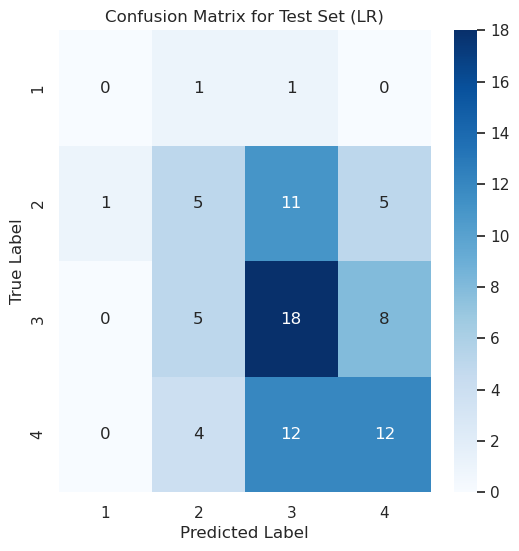



Classification Report for Test Set (LR):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      0.23      0.27        22
           3       0.43      0.58      0.49        31
           4       0.48      0.43      0.45        28

    accuracy                           0.42        83
   macro avg       0.31      0.31      0.30        83
weighted avg       0.41      0.42      0.41        83



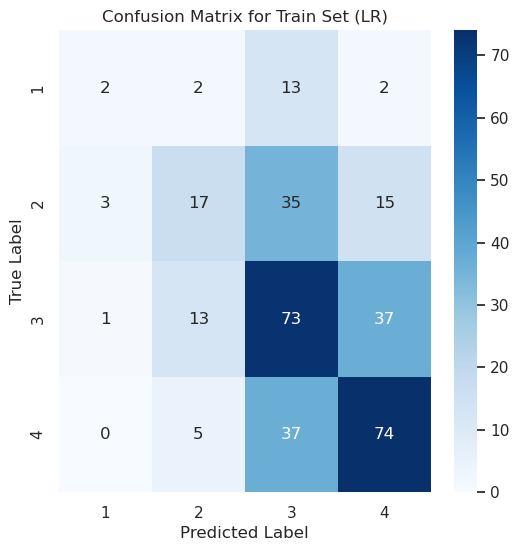

Classification Report for Train Set (LR):
              precision    recall  f1-score   support

           1       0.33      0.11      0.16        19
           2       0.46      0.24      0.32        70
           3       0.46      0.59      0.52       124
           4       0.58      0.64      0.61       116

    accuracy                           0.50       329
   macro avg       0.46      0.39      0.40       329
weighted avg       0.49      0.50      0.49       329

-----------------------------------------------------------------------


Performance Metrics for Test and Train Sets (KNN)


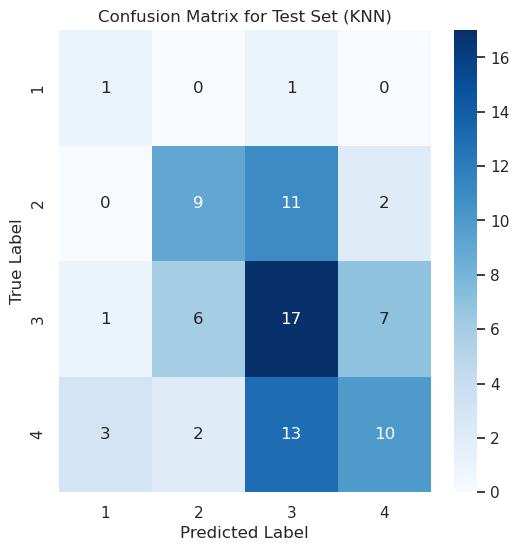



Classification Report for Test Set (KNN):
              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.53      0.41      0.46        22
           3       0.40      0.55      0.47        31
           4       0.53      0.36      0.43        28

    accuracy                           0.45        83
   macro avg       0.42      0.45      0.41        83
weighted avg       0.47      0.45      0.45        83



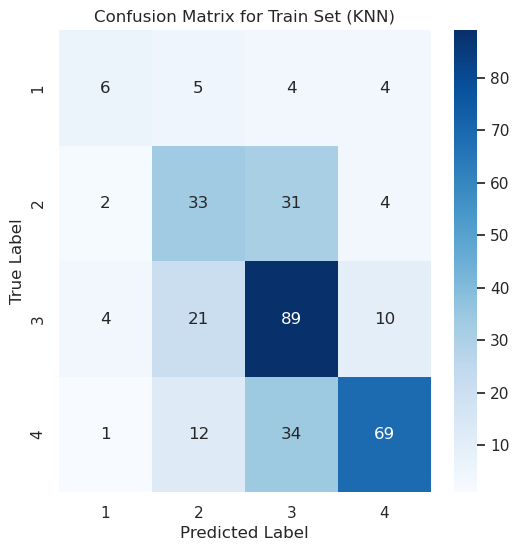

Classification Report for Train Set (KNN):
              precision    recall  f1-score   support

           1       0.46      0.32      0.37        19
           2       0.46      0.47      0.47        70
           3       0.56      0.72      0.63       124
           4       0.79      0.59      0.68       116

    accuracy                           0.60       329
   macro avg       0.57      0.52      0.54       329
weighted avg       0.62      0.60      0.60       329

-----------------------------------------------------------------------


Performance Metrics for Test and Train Sets (CART)


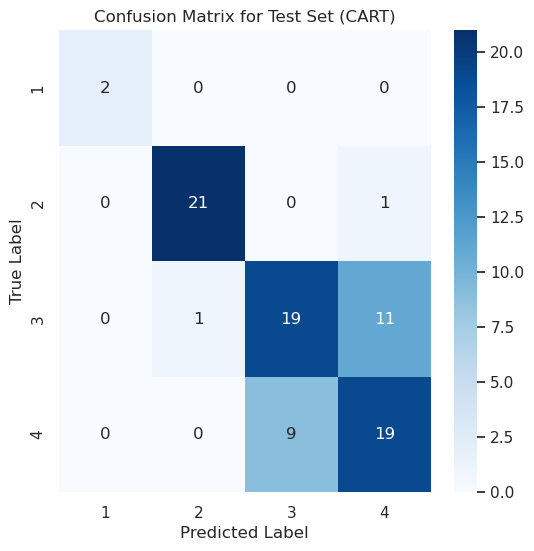



Classification Report for Test Set (CART):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.95      0.95      0.95        22
           3       0.68      0.61      0.64        31
           4       0.61      0.68      0.64        28

    accuracy                           0.73        83
   macro avg       0.81      0.81      0.81        83
weighted avg       0.74      0.73      0.73        83



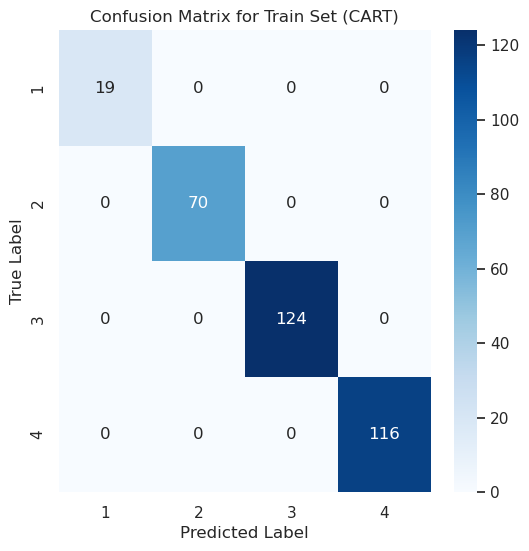

Classification Report for Train Set (CART):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       116

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

-----------------------------------------------------------------------


Performance Metrics for Test and Train Sets (RF)


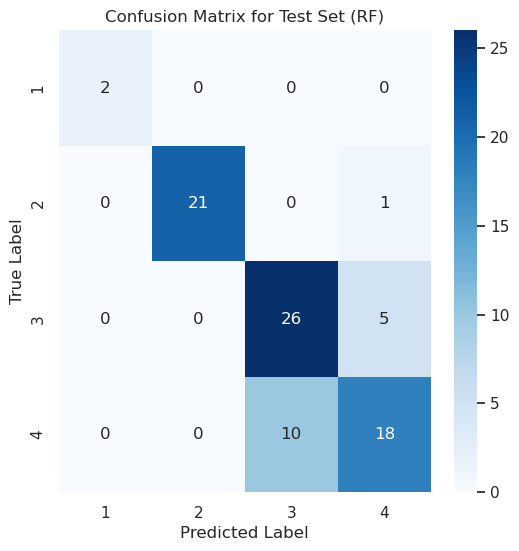



Classification Report for Test Set (RF):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.95      0.98        22
           3       0.72      0.84      0.78        31
           4       0.75      0.64      0.69        28

    accuracy                           0.81        83
   macro avg       0.87      0.86      0.86        83
weighted avg       0.81      0.81      0.81        83



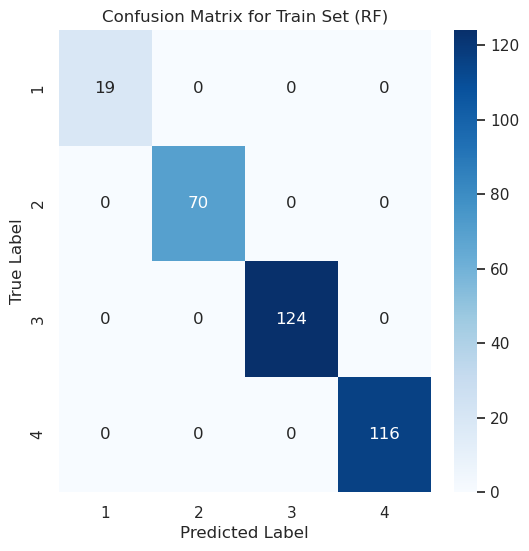

Classification Report for Train Set (RF):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       116

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

-----------------------------------------------------------------------


Performance Metrics for Test and Train Sets (GBM)


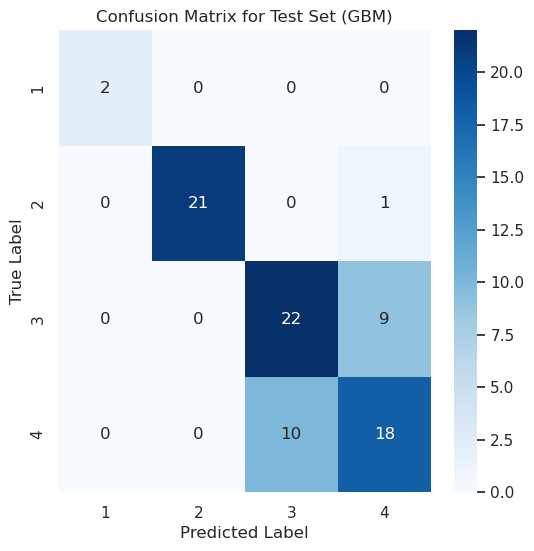



Classification Report for Test Set (GBM):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.95      0.98        22
           3       0.69      0.71      0.70        31
           4       0.64      0.64      0.64        28

    accuracy                           0.76        83
   macro avg       0.83      0.83      0.83        83
weighted avg       0.76      0.76      0.76        83



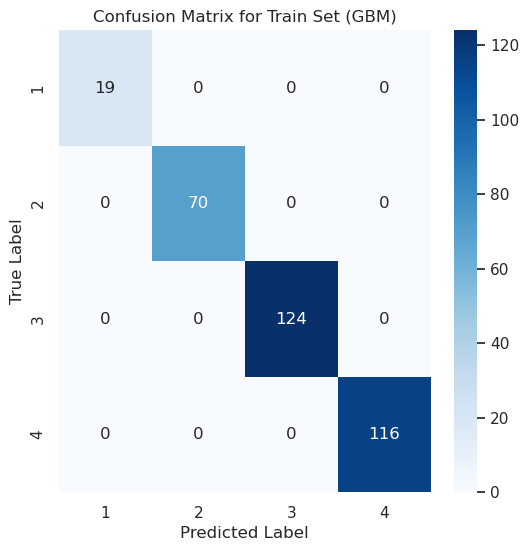

Classification Report for Train Set (GBM):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       116

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

-----------------------------------------------------------------------


Performance Metrics for Test and Train Sets (CatBoost)


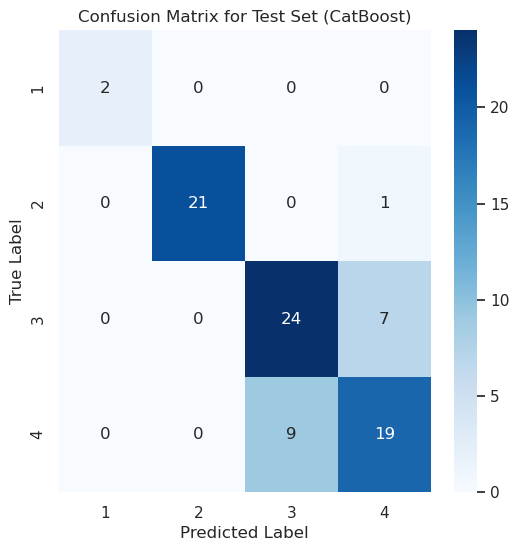



Classification Report for Test Set (CatBoost):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.95      0.98        22
           3       0.73      0.77      0.75        31
           4       0.70      0.68      0.69        28

    accuracy                           0.80        83
   macro avg       0.86      0.85      0.85        83
weighted avg       0.80      0.80      0.80        83



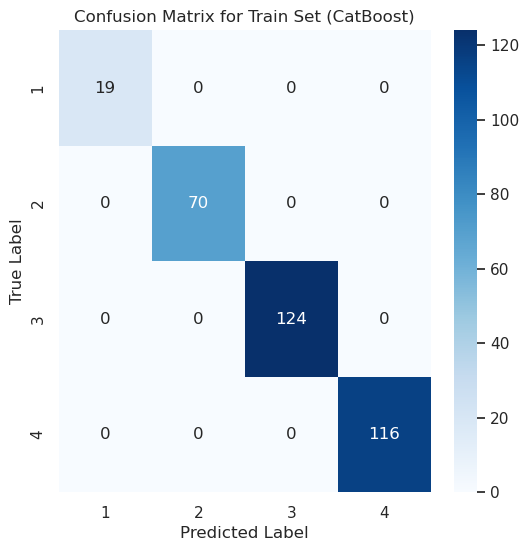

Classification Report for Train Set (CatBoost):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       116

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

-----------------------------------------------------------------------




In [78]:
for name, classifier in models:

    warnings.filterwarnings("ignore")

    model = classifier.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Confusion matrix provides a detailed analysis of correct and incorrect predictions for each class, allowing for a detailed analysis of accuracy.

    # Confusion matrix results for the test set
    print(f"Performance Metrics for Test and Train Sets ({name})")
    cm_test = confusion_matrix(y_test, y_pred)

    class_labels = np.unique(y_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Test Set ({name})')
    plt.show()
    print("\n")

    # Classification report provides f1, precision, recall, and accuracy values for each class for all models, allowing for a detailed analysis of performance metrics in classification models.

    cr_test = classification_report(y_test, y_pred)
    print(f"Classification Report for Test Set ({name}):\n{cr_test}")

    # Confusion matrix results for the train set

    cm_train = confusion_matrix(y_train, y_pred_train)

    class_labels = np.unique(y_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Train Set ({name})')
    plt.show()

    cr_train = classification_report(y_train, y_pred_train)
    print(f"Classification Report for Train Set ({name}):\n{cr_train}")
    print("-----------------------------------------------------------------------")
    print("\n")

**3.3.2. K-fold Cross Validation**

In [79]:
df_cross_validation_final = df.copy()

In [80]:
y = df_cross_validation_final["Stage"].astype(int)
X = df_cross_validation_final.drop(["Stage"], axis=1)

In [81]:
for name, classifier in models:

    warnings.filterwarnings("ignore")

    # Performing k-fold cross-validation using the cross_val_score function
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)

    # To display the results
    print(f"---------------------- {name} Model ----------------------")

    print("Accuracy:", cv_results['test_accuracy'])
    print("Precision:", cv_results['test_precision_macro'])
    print("Recall:", cv_results['test_recall_macro'])
    print("F1-score:", cv_results['test_f1_macro'])
    print("..")
    print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
    print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
    print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
    print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))
    print("\n")

---------------------- LR Model ----------------------
Accuracy: [0.43373494 0.40963855 0.51219512 0.43902439 0.48780488]
Precision: [0.37005929 0.31005398 0.37324085 0.31597222 0.36791939]
Recall: [0.39042284 0.31692621 0.38199852 0.318363   0.35436878]
F1-score: [0.37525388 0.31205534 0.37319917 0.30396096 0.31377507]
..
Average Accuracy: 0.46
Average Precision: 0.35
Average Recall: 0.35
Average F1-score: 0.34


---------------------- KNN Model ----------------------
Accuracy: [0.39759036 0.39759036 0.3902439  0.3902439  0.35365854]
Precision: [0.3003168  0.36911755 0.31571146 0.27314815 0.25892857]
Recall: [0.2869709  0.39855704 0.30217217 0.28276789 0.27912018]
F1-score: [0.27975792 0.36732192 0.28374248 0.27714108 0.26351161]
..
Average Accuracy: 0.39
Average Precision: 0.3
Average Recall: 0.31
Average F1-score: 0.29


---------------------- CART Model ----------------------
Accuracy: [0.73493976 0.72289157 0.73170732 0.69512195 0.6097561 ]
Precision: [0.82925408 0.80803571 0.8173

Random Forest has been chosen as the final model based on the results. It has been selected due to its high performance, utilization of ensemble methods, variable importance ranking, and resistance to overfitting. 

* **High performance:** The Random Forest model exhibits higher average accuracy, precision, recall, and F1-score compared to the other models. This indicates that the model performs better overall.

* **Ensemble method:** Random Forest is an ensemble model created by combining multiple decision trees. This allows different trees to compensate for their own errors and achieve better generalization.

* **Feature importance ranking:** Random Forest can calculate the importance of variables in the split decisions of each tree, providing valuable information on significant variables in the dataset and enhancing the understanding of the model.

* **Resistance to overfitting:** Random Forest incorporates random sampling and variable selection methods during tree construction. These techniques help to resist overfitting and produce a more generalized model.



# **4. The Final Model**

Random Forest is an ensemble learning method that combines multiple decision trees to create a model. It utilizes the principle of bagging, where each tree is trained on a different subset of the data, allowing for more diverse predictions and reducing overfitting. Random Forest can handle both classification and regression tasks effectively. It can handle high-dimensional data with a large number of features without the need for feature selection. Additionally, the algorithm automatically handles missing values and maintains accuracy even with incomplete data. Random Forest provides an estimate of feature importance, which helps identify the most influential variables in the dataset. It is resistant to overfitting due to the averaging effect of multiple trees. Furthermore, Random Forest can handle a wide range of data types, including numerical and categorical variables. It is less sensitive to outliers compared to other models like linear regression. The algorithm can be easily parallelized, making it efficient for large-scale datasets. Overall, Random Forest provides robust predictions by aggregating the predictions of multiple trees and offers a versatile and powerful machine learning technique.

#### **4.1. Creation of the Final Model**

In [82]:
rf_model = RandomForestClassifier(random_state=17)

In [83]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(rf_model, X, y, cv=5, scoring=scoring)

In [84]:
print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))

Average Accuracy: 0.77
Average Precision: 0.86
Average Recall: 0.83
Average F1-score: 0.83


It returns a dictionary containing the parameter names as keys and their corresponding values.

In [85]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

The **rf_params** dictionary represents a set of hyperparameters for the Random Forest model. Each hyperparameter has a key-value pair, where the key represents the name of the hyperparameter, and the value is a list of possible values for that hyperparameter.

In [86]:
rf_params = {"max_depth": [5, 8, None], # depth of the decision trees
             "max_features": [3, 5, 7, 9], # number of features to consider when looking for the best split
             "min_samples_split": [2, 5, 8, 15, 20], # minimum number of samples required to split an internal node
             "n_estimators": [100, 200, 500] # number of trees in the random forest
             }

Grid Search is a method used to find the best combination of hyperparameters for a specific machine learning model. The GridSearchCV class performs cross-validation on a given model and set of hyperparameters to find the best hyperparameter combination.

Grid Search works by exhaustively searching through a predefined set of hyperparameter values and evaluating the model's performance for each combination. It trains and evaluates the model using different combinations of hyperparameters and returns the best combination that yields the highest performance based on a specified evaluation metric, such as accuracy or F1-score.

The process involves creating a grid of all possible combinations of hyperparameters and performing a cross-validation for each combination. This way, Grid Search helps to find the optimal hyperparameters that maximize the model's performance on the given dataset. It is particularly useful when there are multiple hyperparameters to tune and their interactions need to be explored systematically.

In [87]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


This line returns a dictionary containing the best parameters found by the GridSearchCV algorithm. These parameters are the ones that resulted in the highest performance based on the chosen evaluation metric during the grid search process.

In [88]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

The set_params() method is a convenient function provided by scikit-learn that allows you to set the parameters of an estimator object. It takes keyword arguments representing the parameter names and their corresponding values, and modifies the parameters of the estimator accordingly.

In the context of the code, the set_params() method is used to update the parameters of the random forest classifier (rf_model). The ****rf_best_grid.best_params_** part unpacks the best parameter values obtained from the grid search and passes them as keyword arguments to set_params(). This updates the parameters of the random forest classifier with the best parameter values.

In [89]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

In [90]:
cv_results = cross_validate(rf_final, X, y, cv=5, scoring=scoring)

In [91]:
print("Average Accuracy:", cv_results['test_accuracy'].mean().round(2))
print("Average Precision:", cv_results['test_precision_macro'].mean().round(2))
print("Average Recall:", cv_results['test_recall_macro'].mean().round(2))
print("Average F1-score:", cv_results['test_f1_macro'].mean().round(2))

Average Accuracy: 0.79
Average Precision: 0.88
Average Recall: 0.85
Average F1-score: 0.85


#### **4.2. Feature Importance**

This function provides a useful tool to visually examine and understand the feature importance ranking of a model.

In [92]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value":model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])

    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importance.png")

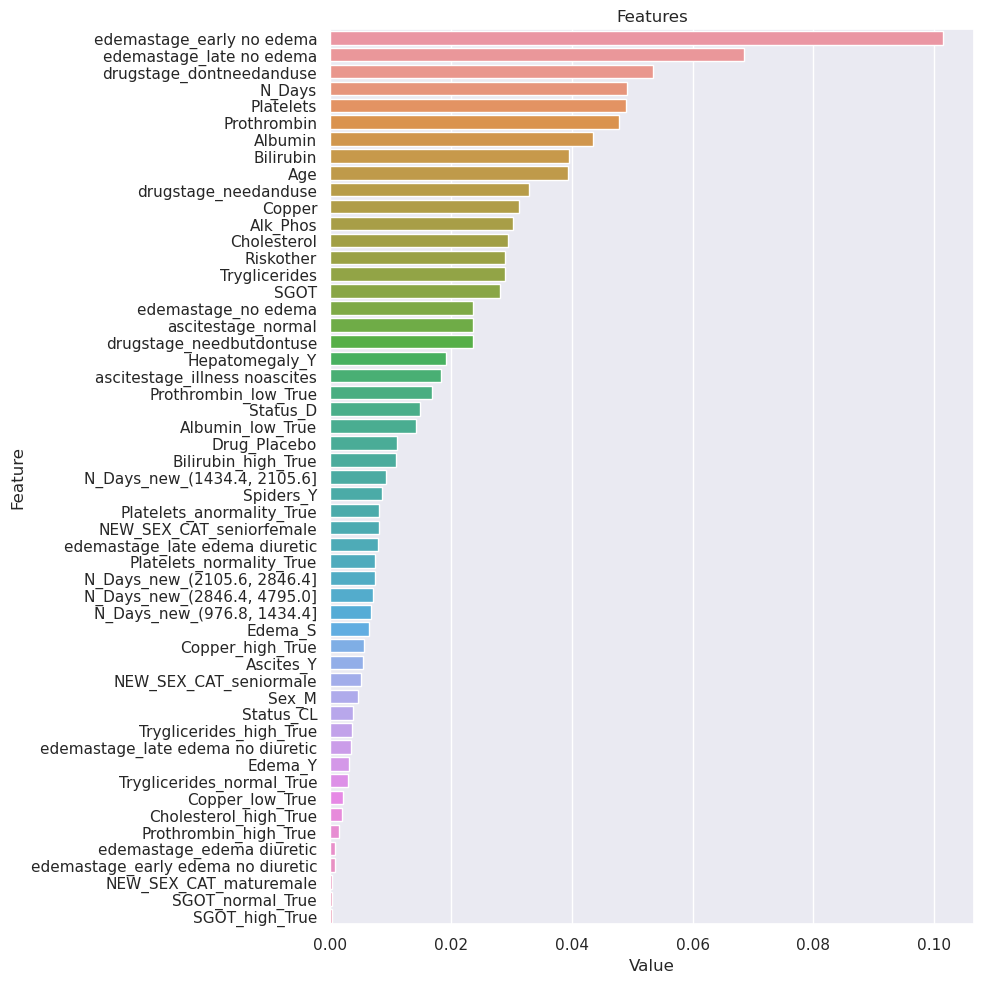

In [93]:
plot_importance(rf_final, X, save=True)

It can be observed that the newly added variables resulting from feature engineering are ranked high in terms of importance by the model.

# **5. Acknowledgments**

This study was prepared as the final project of the data science bootcamp in collaboration between [YetGen](https://yetkingencler.com/) and [miuul](http://www.miuul.com/). We would like to express our gratitude to Yetgen and miuul for providing us with this opportunity and enabling us to reach a level where we can undertake and complete a project in this field. Additionally, we extend our thanks to the mentors who taught us throughout the bootcamp and our team leader [Nedim Soruk](http://www.linkedin.com/in/nedimsoruk/?originalSubdomain=tr), who provided unwavering support.

The team members who contributed to the preparation of this project and their LinkedIn profiles are provided below. Please feel free to reach out to us via our LinkedIn profiles for any questions or concerns.

• Suzan Küçükçallı: https://www.linkedin.com/in/suzan-k%C...

• Gülşah Nur Seher: https://www.linkedin.com/in/gulsahseher/

• Hatice Akbay: https://www.linkedin.com/in/haticeakbay/

• Nisa Özge Vural: https://www.linkedin.com/in/ozgevural/

![](https://yetkingencler.com/wp-content/uploads/2021/12/jump.png) ![](https://www.miuul.com/image/theme/logo-dark.png)